In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('training_data.csv')

In [3]:
df.head().to_dict()

{'Unnamed: 0': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'age': {0: 58, 1: 44, 2: 33, 3: 47, 4: 33},
 'job': {0: 'management',
  1: 'technician',
  2: 'entrepreneur',
  3: 'blue-collar',
  4: 'unknown'},
 'marital': {0: 'married',
  1: 'single',
  2: 'married',
  3: 'married',
  4: 'single'},
 'education': {0: 'tertiary',
  1: 'secondary',
  2: 'secondary',
  3: 'unknown',
  4: 'unknown'},
 'default': {0: 'no', 1: 'no', 2: 'no', 3: 'no', 4: 'no'},
 'balance': {0: 2143, 1: 29, 2: 2, 3: 1506, 4: 1},
 'housing': {0: 'yes', 1: 'yes', 2: 'yes', 3: 'yes', 4: 'no'},
 'loan': {0: 'no', 1: 'no', 2: 'yes', 3: 'no', 4: 'no'},
 'contact': {0: 'unknown',
  1: 'unknown',
  2: 'unknown',
  3: 'unknown',
  4: 'unknown'},
 'day': {0: 5, 1: 5, 2: 5, 3: 5, 4: 5},
 'month': {0: 5, 1: 5, 2: 5, 3: 5, 4: 5},
 'duration': {0: 261, 1: 151, 2: 76, 3: 92, 4: 198},
 'campaign': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 'pdays': {0: -1, 1: -1, 2: -1, 3: -1, 4: -1},
 'previous': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'poutcome': {0: 'unkn

In [4]:
df.describe()

Unnamed: 0           age        balance           day         month  \
count  40211.000000  40211.000000   40211.000000  40211.000000  40211.000000   
mean   22589.666285     40.949243    1366.583447     15.807739      6.141056   
std    13057.606981     10.631757    3042.498504      8.328661      2.408752   
min        0.000000     18.000000   -8019.000000      1.000000      1.000000   
25%    11285.500000     33.000000      73.000000      8.000000      5.000000   
50%    22547.000000     39.000000     451.000000     16.000000      6.000000   
75%    33879.000000     48.000000    1432.000000     21.000000      8.000000   
max    45210.000000     95.000000  102127.000000     31.000000     12.000000   

           duration      campaign         pdays      previous  
count  40211.000000  40211.000000  40211.000000  40211.000000  
mean     258.624879      2.758350     40.139837      0.575514  
std      258.079517      3.090144    100.077854      2.326472  
min        0.000000      1.000000     -1.000000      0.000000  
25%      103.000000      1.000000     -1.000000      0.000000  
50%      180.000000      2.000000     -1.000000      0.000000  
75%      319.000000      3.000000     -1.000000      0.000000  
max     4918.000000     63.000000    871.000000    275.000000

In [5]:
def summarise_df(df):
    numeric_cols = df.select_dtypes(include=[np.number])  # Selecting only numeric columns

    summary_df = pd.DataFrame({
        'Count of null values': df.isnull().sum(),
        'Count of all values': [len(df)] * df.shape[1],
        'Unique count of values': df.nunique(),
        'Data Type': df.dtypes,
        'Min': numeric_cols.min(),
        'Max': numeric_cols.max(),
        'Median': numeric_cols.median(),
        '25% Quartile': numeric_cols.quantile(0.25),
        '50% Quartile': numeric_cols.quantile(0.5),  # Same as Median
        '75% Quartile': numeric_cols.quantile(0.75)
    })

    # Fill NaN values for non-numeric columns as these stats won't be applicable
    summary_df.fillna('N/A', inplace=True)
    return summary_df


def check_null_counts_per_column(df):
    data = []

    # Iterate over each column in the original DataFrame
    for col in df.columns:
        # Calculate the count of non-NaN entries
        count = df[col].count()
        # Calculate the count of NaN entries
        nan_count = df[col].isna().sum()
        
        # Append the data for this column as a new row in the data list
        data.append({'Column': col, 'Count': count, 'NaN Count': nan_count})

    # Convert the list of data into a new DataFrame
    summary_df = pd.DataFrame(data)
    return summary_df

In [6]:
summerised_df = summarise_df(df)

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\2443245478.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_df.fillna('N/A', inplace=True)


In [7]:
summerised_df

Count of null values  Count of all values  Unique count of values  \
Unnamed: 0                     0                40211                   40211   
age                            0                40211                      77   
balance                        0                40211                    6871   
campaign                       0                40211                      48   
contact                        0                40211                       3   
day                            0                40211                      31   
default                        0                40211                       2   
duration                       0                40211                    1539   
education                      0                40211                       4   
housing                        0                40211                       2   
job                            0                40211                      12   
loan                           0                40211                       2   
marital                        0                40211                       3   
month                          0                40211                      12   
pdays                          0                40211                     546   
poutcome                       0                40211                       4   
previous                       0                40211                      40   
y                              0                40211                       2   

           Data Type     Min       Max   Median 25% Quartile 50% Quartile  \
Unnamed: 0     int64     0.0   45210.0  22547.0      11285.5      22547.0   
age            int64    18.0      95.0     39.0         33.0         39.0   
balance        int64 -8019.0  102127.0    451.0         73.0        451.0   
campaign       int64     1.0      63.0      2.0          1.0          2.0   
contact       object     N/A       N/A      N/A          N/A          N/A   
day            int64     1.0      31.0     16.0          8.0         16.0   
default       object     N/A       N/A      N/A          N/A          N/A   
duration       int64     0.0    4918.0    180.0        103.0        180.0   
education     object     N/A       N/A      N/A          N/A          N/A   
housing       object     N/A       N/A      N/A          N/A          N/A   
job           object     N/A       N/A      N/A          N/A          N/A   
loan          object     N/A       N/A      N/A          N/A          N/A   
marital       object     N/A       N/A      N/A          N/A          N/A   
month          int64     1.0      12.0      6.0          5.0          6.0   
pdays          int64    -1.0     871.0     -1.0         -1.0         -1.0   
poutcome      object     N/A       N/A      N/A          N/A          N/A   
previous       int64     0.0     275.0      0.0          0.0          0.0   
y             object     N/A       N/A      N/A          N/A          N/A   

           75% Quartile  
Unnamed: 0      33879.0  
age                48.0  
balance          1432.0  
campaign            3.0  
contact             N/A  
day                21.0  
default             N/A  
duration          319.0  
education           N/A  
housing             N/A  
job                 N/A  
loan                N/A  
marital             N/A  
month               8.0  
pdays              -1.0  
poutcome            N/A  
previous            0.0  
y                   N/A

So According to the above, we don't have any missing values, i.e., NULL values. But what about empty strings or 'unknown' value entries

In [8]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [9]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [11]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [16]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  18,  21,   8,
         7,   9,  12,  14,  26,  13,  15,  25,  20,  27,  17,  23,  51,
       275,  24,  29,  22,  19,  30,  58,  28,  32,  37,  40,  55,  35,
        41], dtype=int64)

IN terms of missing values - where unknown is selected we have: contact, education, job, and poutcome

<h3>Let's Look at the AGE variable

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

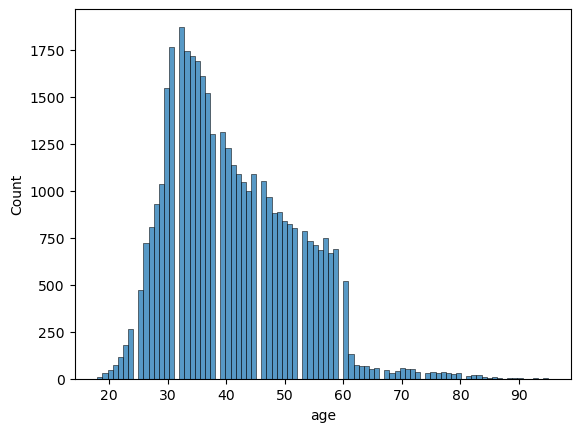

In [18]:
sns.histplot(data=df,x='age')

We can see that a majority of the people are in there 30's. 

Let's Look at the balance distribution

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='balance', ylabel='Count'>

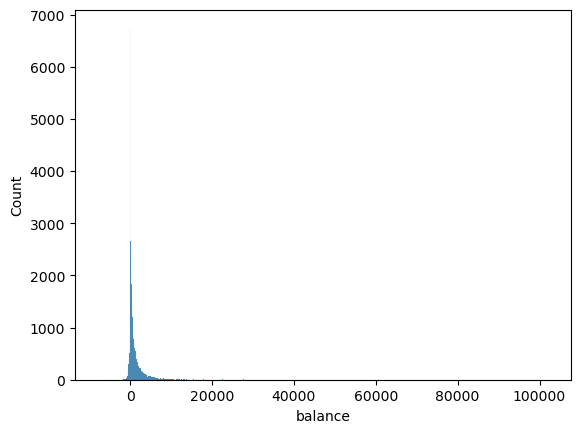

In [19]:
sns.histplot(data=df,x='balance')

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Count'>

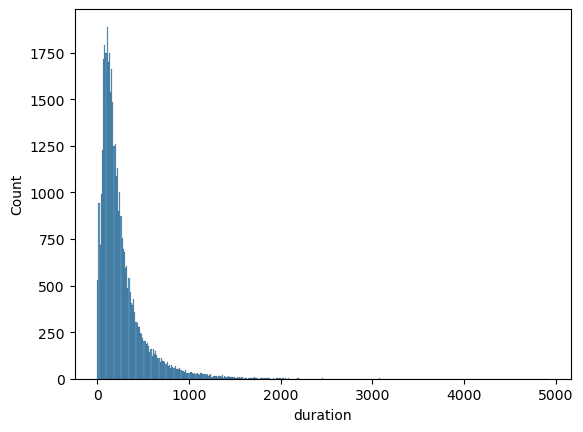

In [20]:
sns.histplot(data=df,x='duration')

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

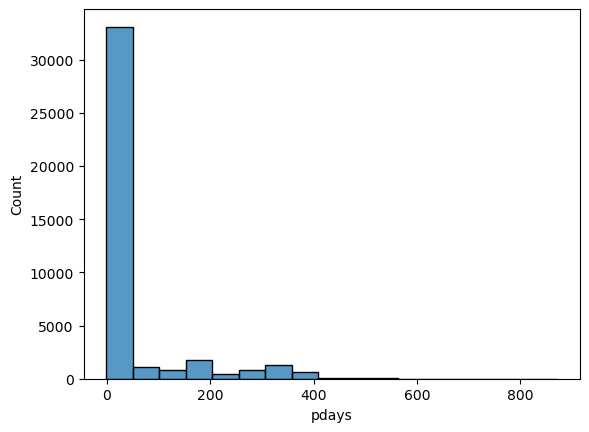

In [21]:
sns.histplot(data=df,x='pdays')

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='campaign', ylabel='Count'>

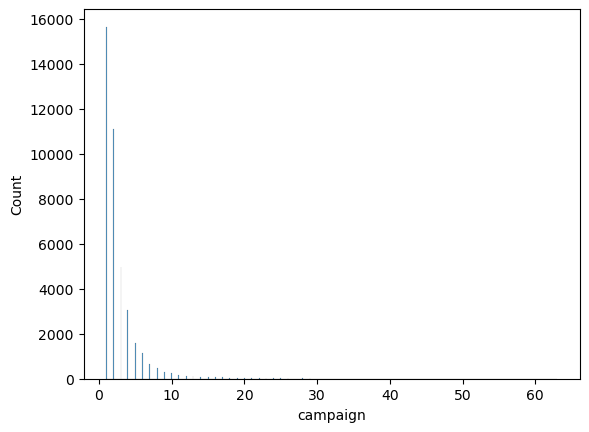

In [22]:
sns.histplot(data=df,x='campaign')

<h3>Let's explore the contacts variables


<h4>Count check

In [23]:
df_contact = df.groupby('contact').size().reset_index(name='count')

In [24]:
df_contact

contact  count
0   cellular  26063
1  telephone   2555
2    unknown  11593

<Axes: xlabel='count', ylabel='poutcome'>

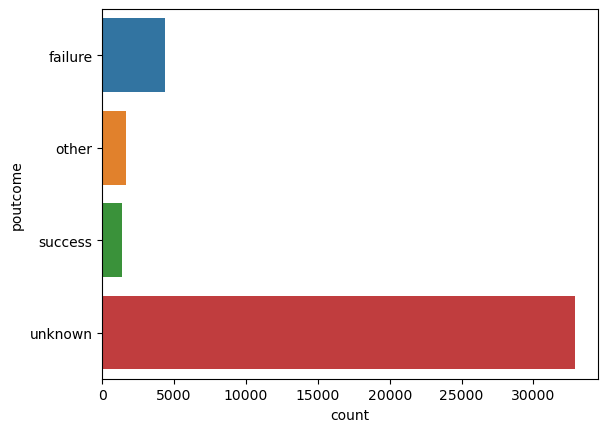

In [25]:
df_poutcome = df.groupby(['poutcome']).size().reset_index(name='count')
sns.barplot(data=df_poutcome,y='poutcome',x='count')

<Axes: xlabel='pdays', ylabel='count'>

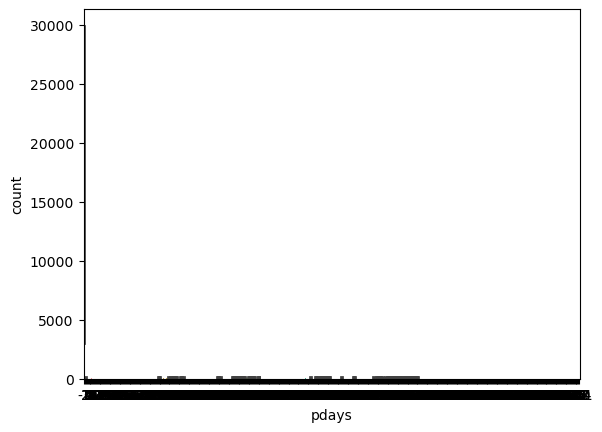

In [26]:
df_pdays = df.groupby(['pdays','y']).size().reset_index(name='count')
sns.barplot(data=df_pdays,y='count',x='pdays')

<Axes: xlabel='previous', ylabel='count'>

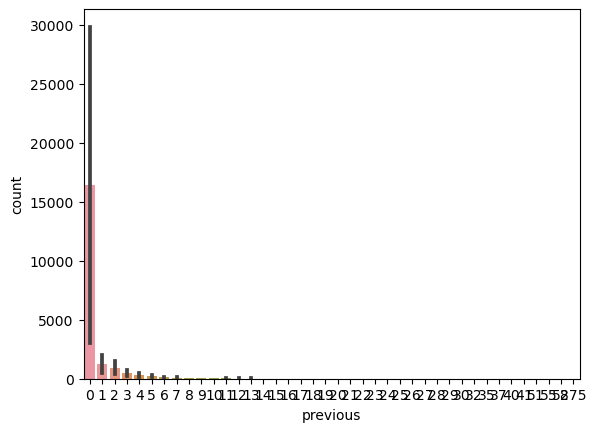

In [27]:
df_previous = df.groupby(['previous','y']).size().reset_index(name='count')
sns.barplot(data=df_previous,y='count',x='previous')

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='y'>

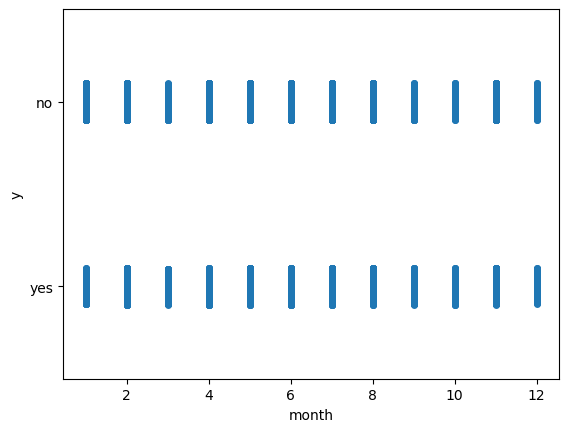

In [28]:
sns.stripplot(data=df,x='month',y='y')

<Axes: xlabel='count', ylabel='contact'>

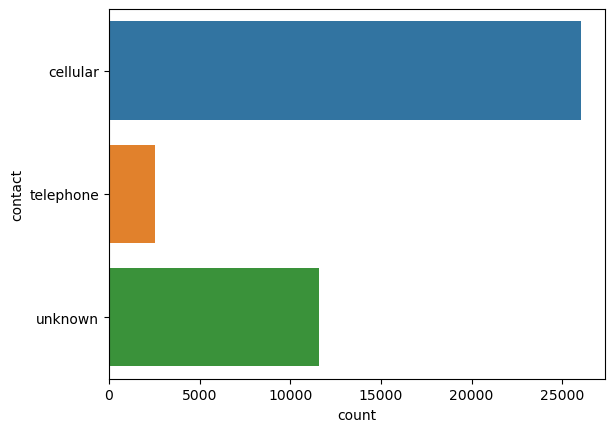

In [29]:
sns.barplot(data=df_contact,y='contact',x='count')

<Axes: xlabel='count', ylabel='loan'>

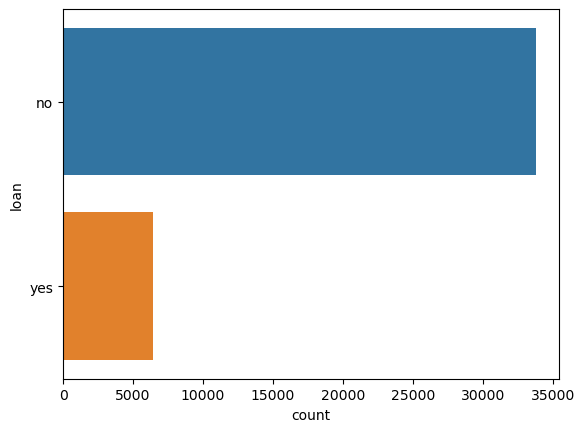

In [30]:
df_loan = df.groupby(['loan']).size().reset_index(name='count')
sns.barplot(data=df_loan,y='loan',x='count')

<Axes: xlabel='count', ylabel='marital'>

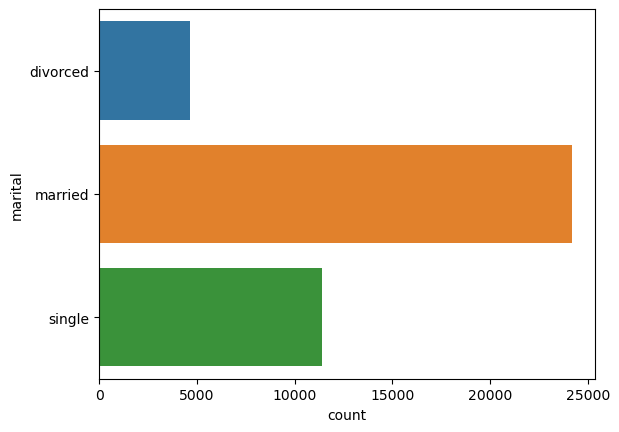

In [31]:
df_marital = df.groupby(['marital']).size().reset_index(name='count')
sns.barplot(data=df_marital,y='marital',x='count')

<h3> Let's look at the default variable

In [32]:
df_default = df.groupby('default').size().reset_index(name='count')

<Axes: xlabel='count', ylabel='default'>

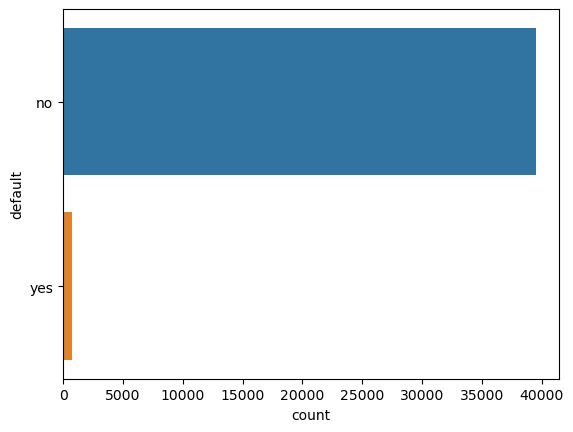

In [33]:
sns.barplot(data=df_default,y='default',x='count')

From the default, we can see that very few have defaulted on their loan

In [34]:
df_edu =df.groupby('education').size().reset_index(name='count')

<Axes: xlabel='count', ylabel='education'>

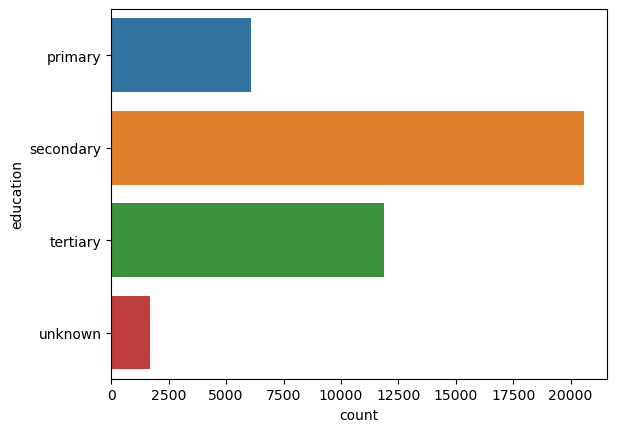

In [35]:
sns.barplot(data=df_edu,y='education',x='count')

In [36]:
df_housing = df.groupby('housing').size().reset_index(name='count')

<Axes: xlabel='count', ylabel='housing'>

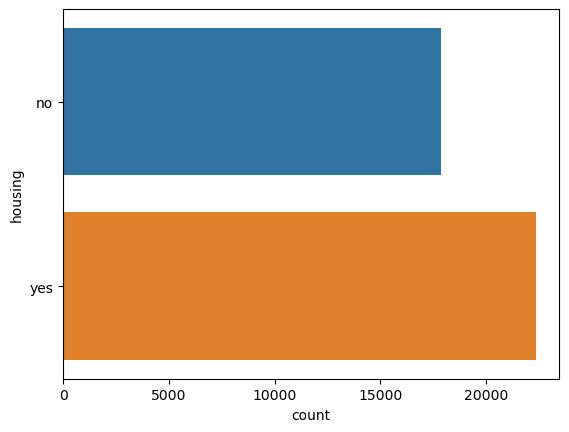

In [37]:
sns.barplot(data=df_housing,y='housing',x='count')

In [38]:
df_housing_edu = df.groupby(['housing','education']).size().reset_index(name='count')

In [39]:
df_housing_edu

housing  education  count
0      no    primary   2624
1      no  secondary   8112
2      no   tertiary   6174
3      no    unknown    954
4     yes    primary   3460
5     yes  secondary  12455
6     yes   tertiary   5701
7     yes    unknown    731

<Axes: >

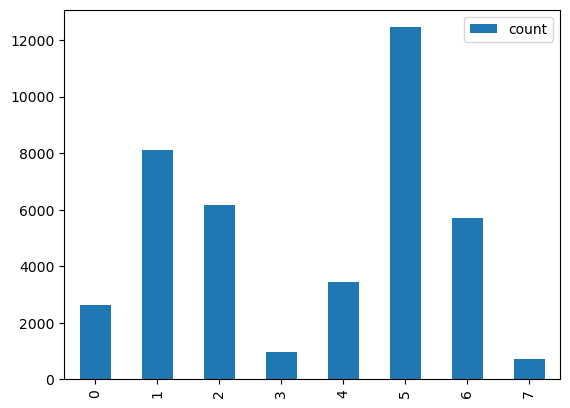

In [40]:
df_housing_edu.plot(kind='bar')

In [41]:
df_housing_age = df.groupby(['housing'])['age'].median()

In [42]:
df_housing_age

housing
no     42.0
yes    38.0
Name: age, dtype: float64

<Axes: xlabel='housing'>

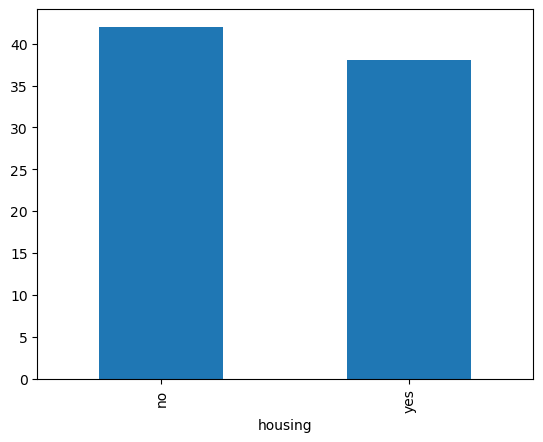

In [43]:
df_housing_age.plot(kind='bar')

In [44]:
df_housing_age_min = df.groupby(['housing'])['age'].min()

In [45]:
df_housing_age_min

housing
no     18
yes    20
Name: age, dtype: int64

In [46]:
df_edu_age = df.groupby(['education'])['age'].median()

<Axes: xlabel='education'>

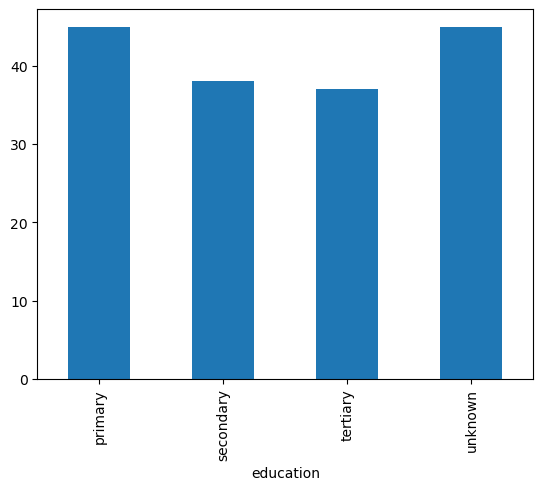

In [47]:
df_edu_age.plot(kind='bar')

In [48]:
df_edu_age_min = df.groupby(['education'])['age'].min()

<Axes: xlabel='education'>

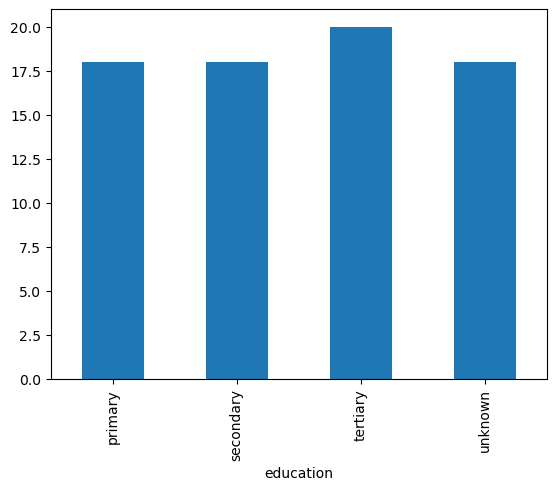

In [49]:
df_edu_age_min.plot(kind='bar')

In [50]:
education_housing_age_correlation = df.groupby(['housing', 'education'])['age'].median()

<Axes: xlabel='housing,education'>

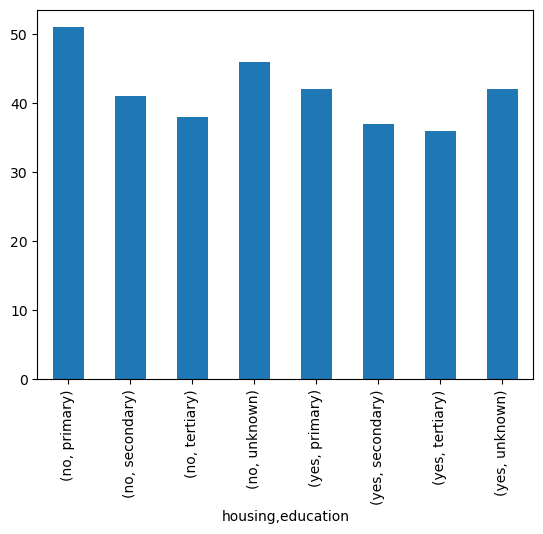

In [51]:
education_housing_age_correlation.plot(kind='bar')

<Axes: >

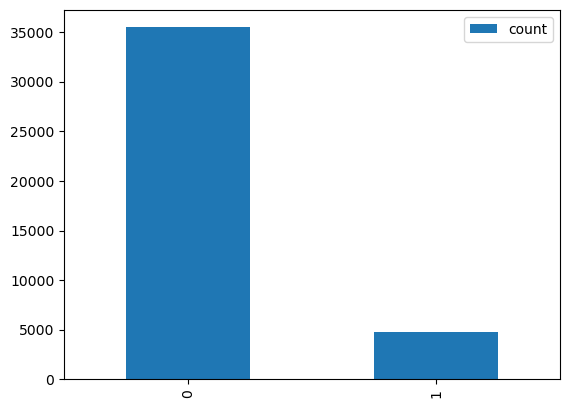

In [52]:
df_y = df.groupby('y').size().reset_index(name='count')
df_y.plot(kind='bar')

In [53]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Compute the correlation matrix
correlation_matrix_with_categorical = data_encoded.corr()

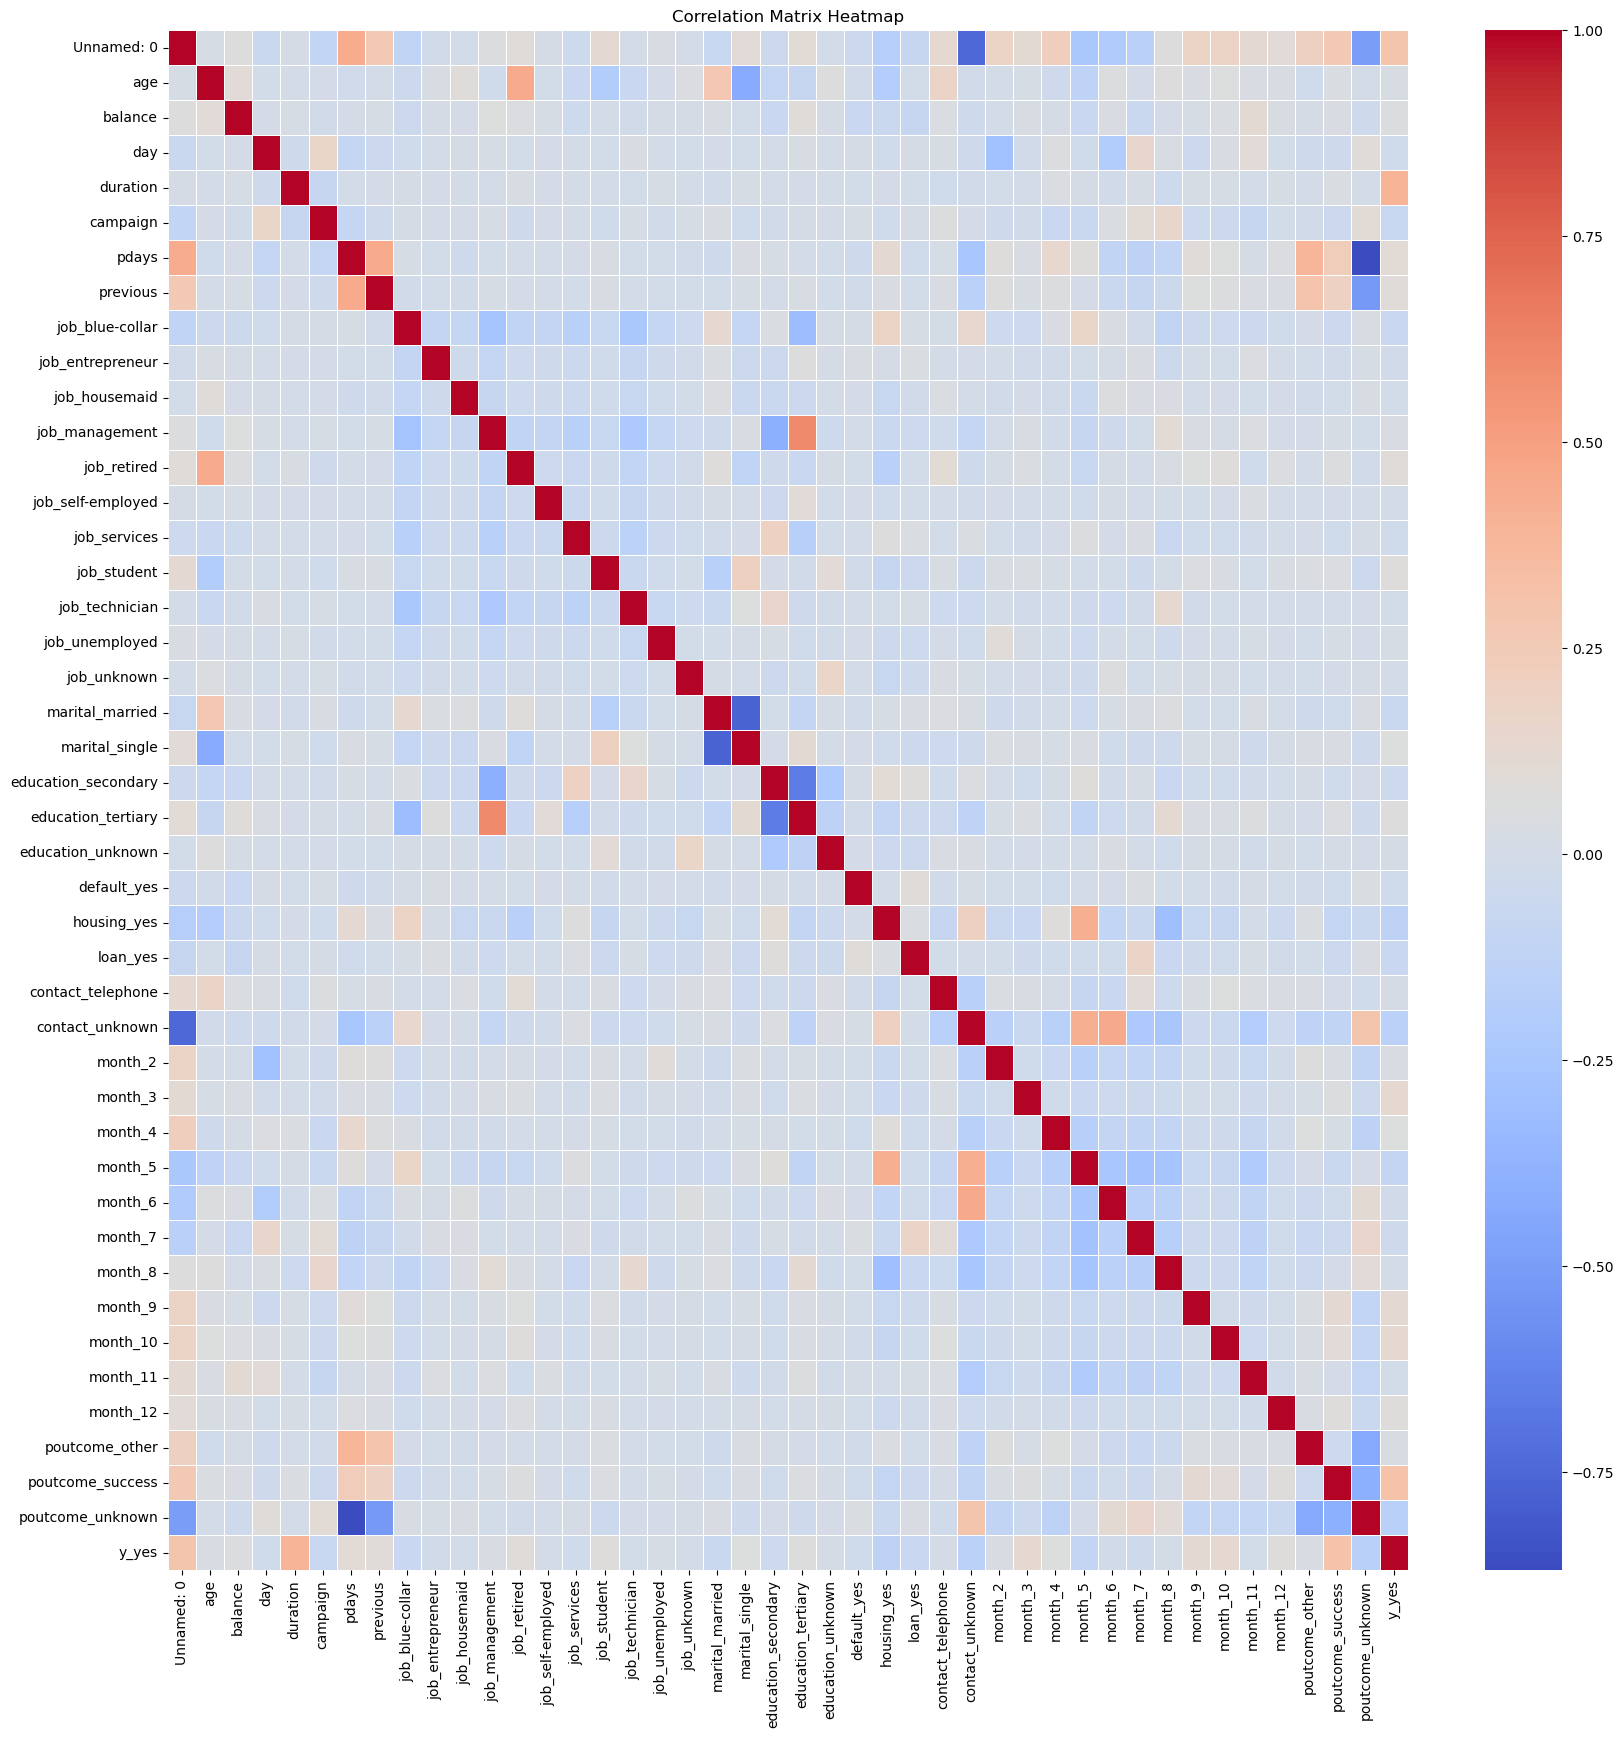

In [54]:
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(correlation_matrix_with_categorical, annot=False, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

<Figure size 1200x800 with 0 Axes>

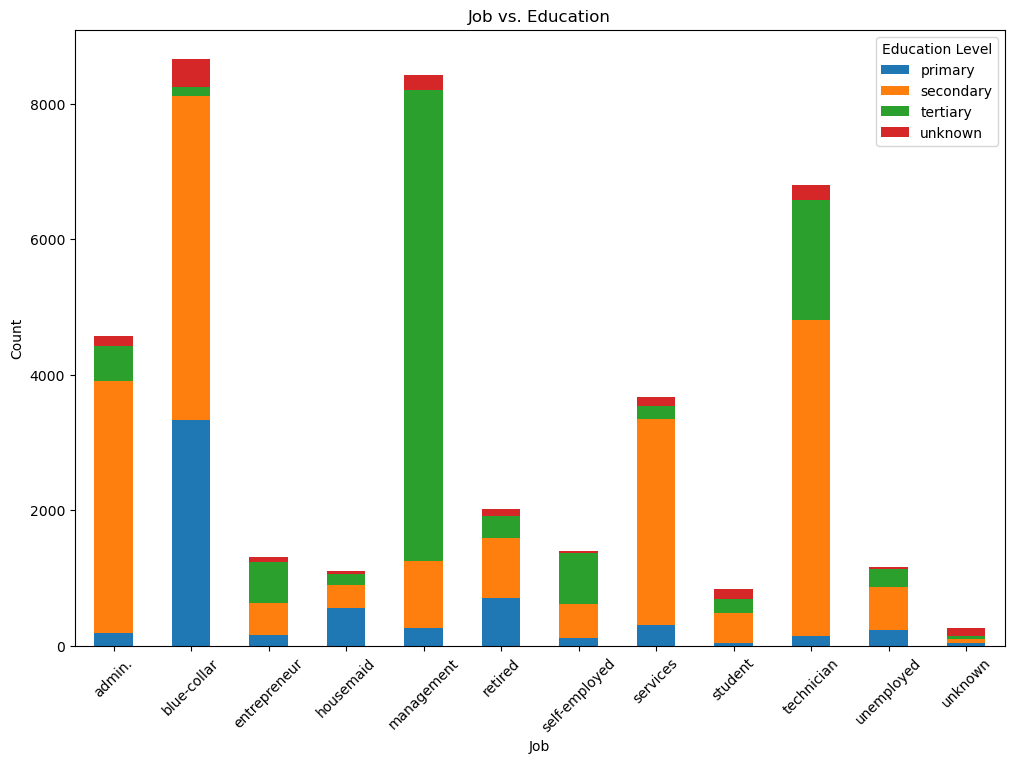

In [55]:
plt.figure(figsize=(12, 8))
education_job_counts = df.groupby(['job', 'education']).size().unstack()
education_job_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Job vs. Education')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

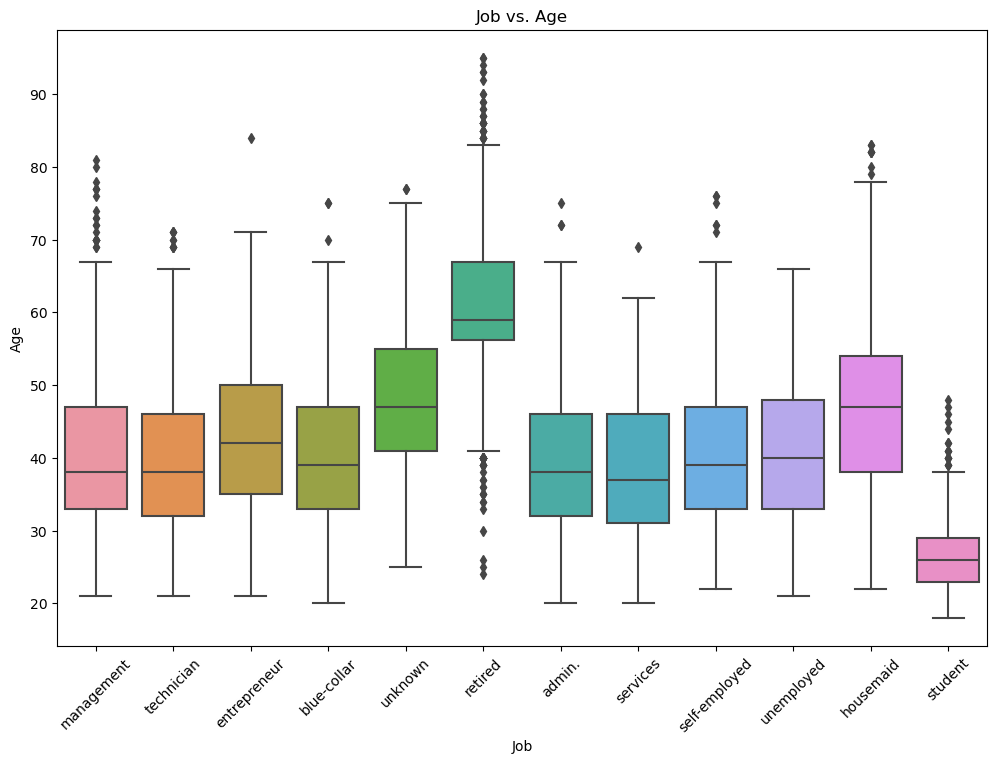

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job', y='age', data=df)
plt.title('Job vs. Age')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

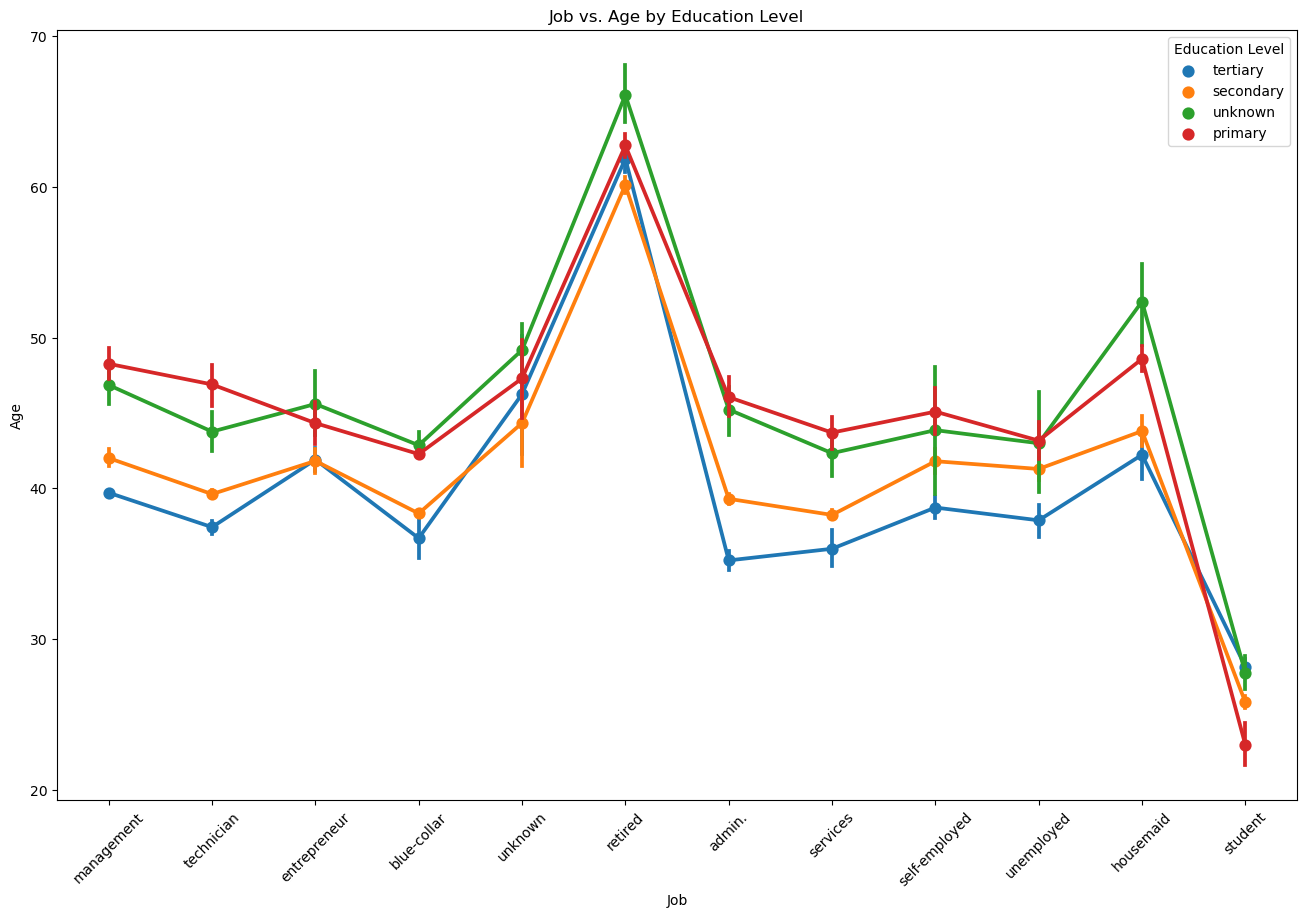

In [57]:
plt.figure(figsize=(16, 10))
sns.pointplot(x='job', y='age', hue='education', data=df)
plt.title('Job vs. Age by Education Level')
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

In [58]:
def plot_proportion_countplot(data, x, hue=None, order=None):
    total = len(data)
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=x, hue=hue, data=data, order=order)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.01,
                '{:.1%}'.format(height / total),
                ha="center")
    plt.title(f'Proportion of {x}' + (f' by {hue}' if hue else ''))
    plt.show()

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


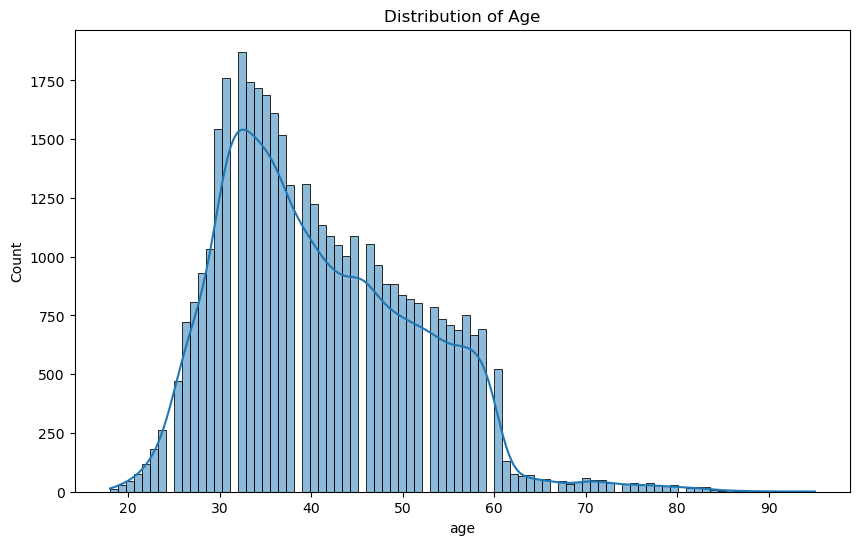

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


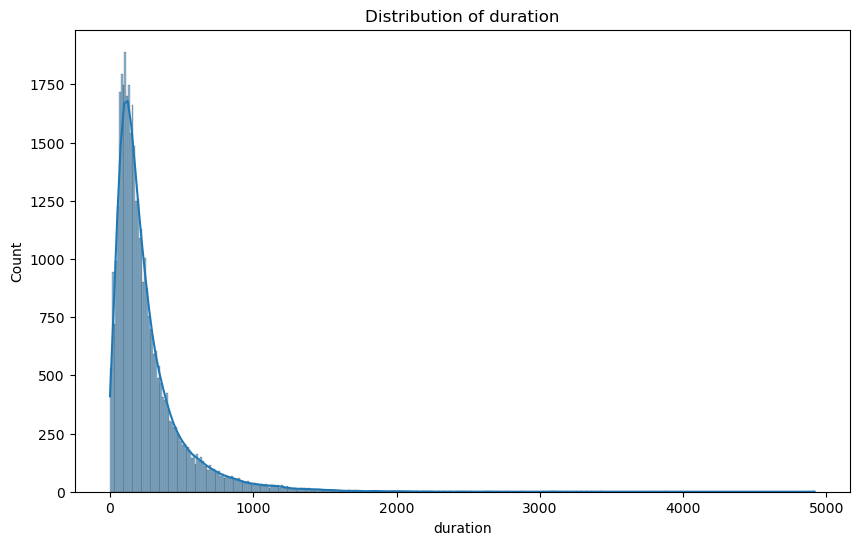

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True)
plt.title('Distribution of duration')
plt.show()

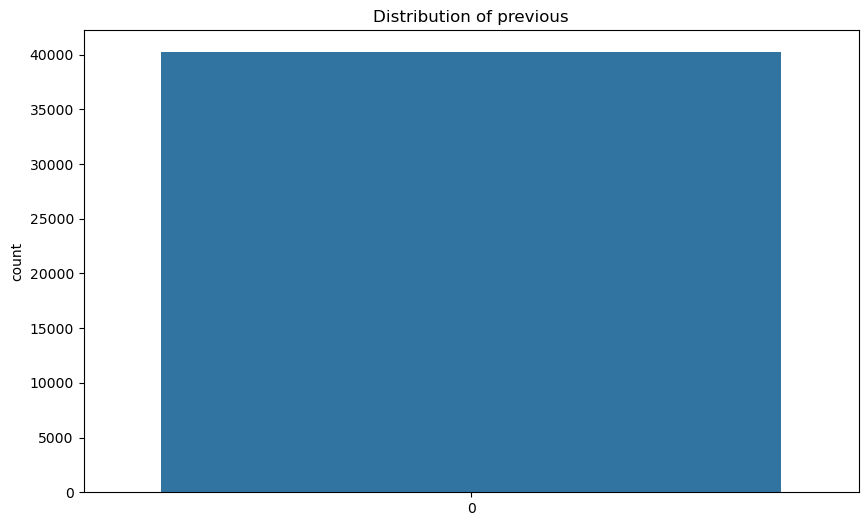

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(df['previous'])
plt.title('Distribution of previous')
plt.show()

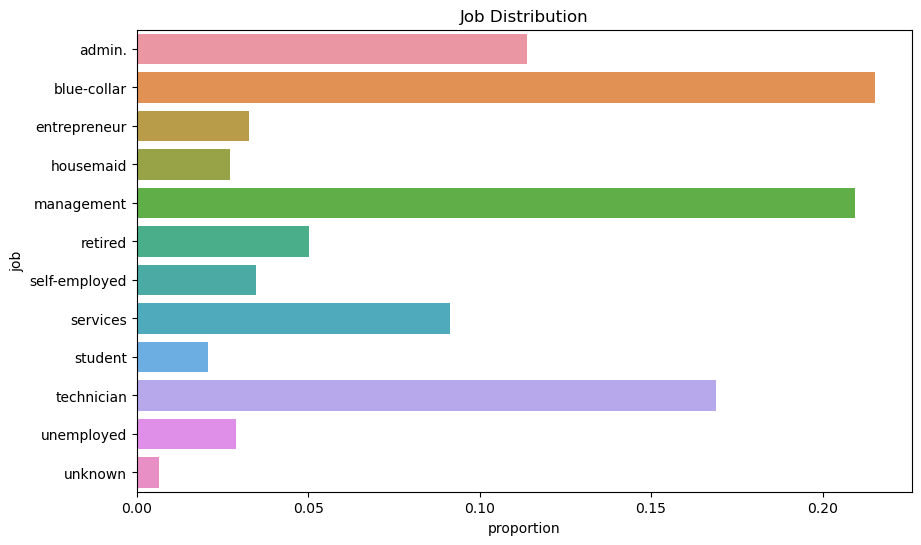

In [62]:
plt.figure(figsize=(10, 6))
data = df.groupby('job').size().reset_index(name='count')
data['proportion'] = data['count']/len(df)
sns.barplot(data=data,x='proportion',y='job')
plt.title('Job Distribution')
plt.show()

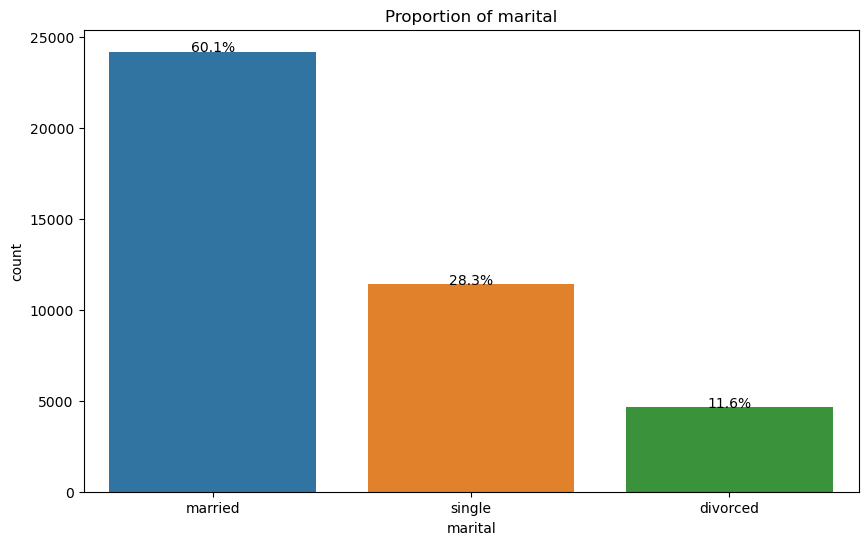

In [63]:
plot_proportion_countplot(df, 'marital')

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\2779383538.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'marital']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\2779383538.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('age_category').size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

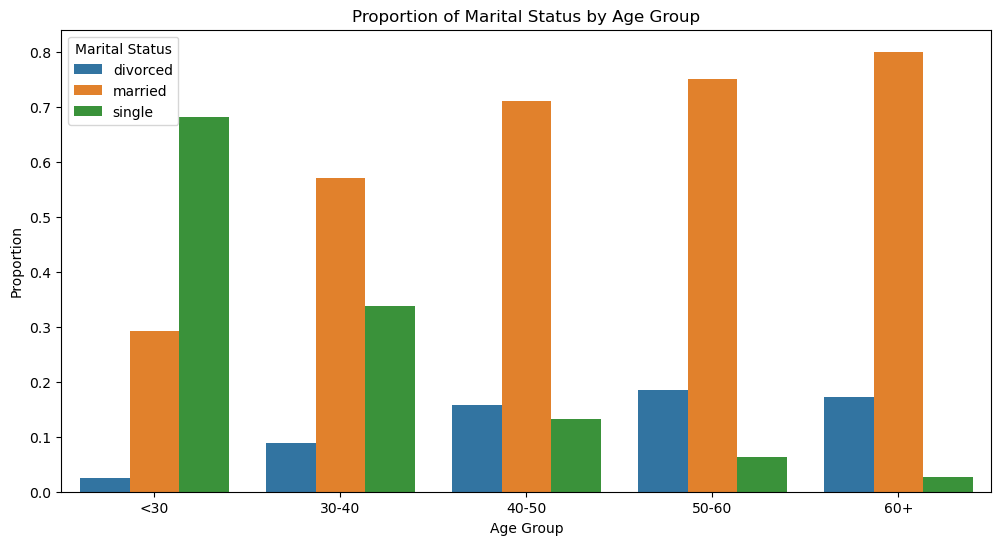

In [64]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'marital']).size().reset_index(name='count')
total_counts = df.groupby('age_category').size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on='age_category')
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Marital Status by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='proportion', hue='marital', data=proportion_df, dodge=True)
plt.title('Proportion of Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Marital Status')
plt.show()

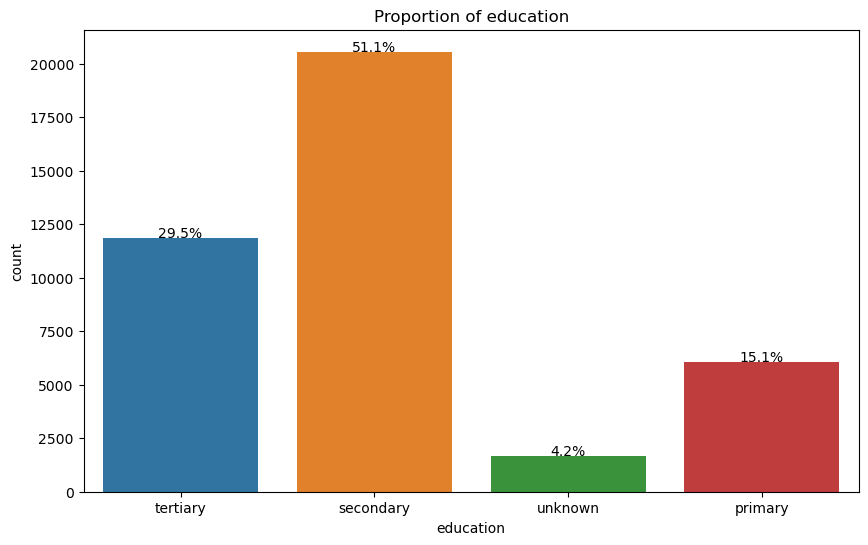

In [65]:
plot_proportion_countplot(df, 'education')

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\3953390144.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'education']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\3953390144.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('age_category').size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

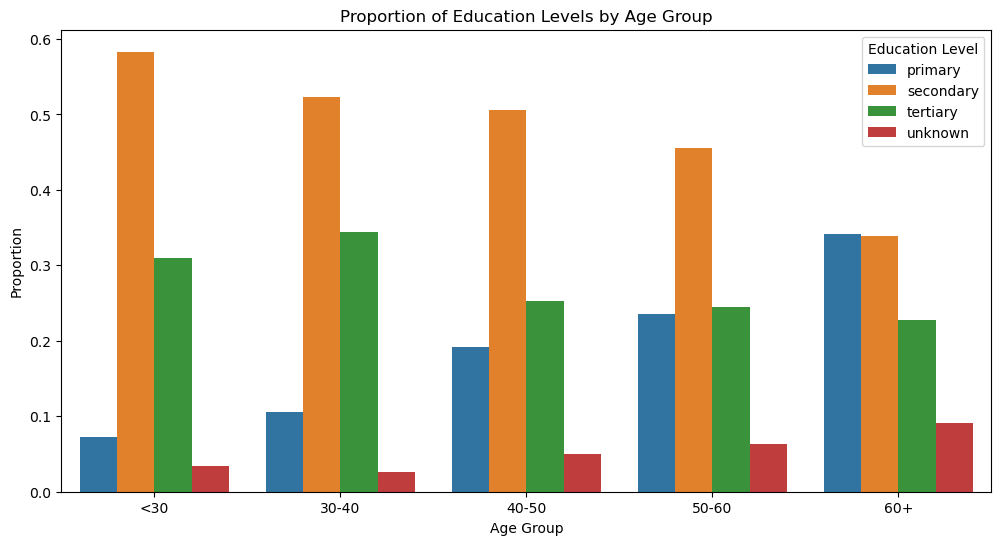

In [66]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'education']).size().reset_index(name='count')
total_counts = df.groupby('age_category').size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on='age_category')
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Education by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='proportion', hue='education', data=proportion_df, dodge=True)
plt.title('Proportion of Education Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Education Level')
plt.show()

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


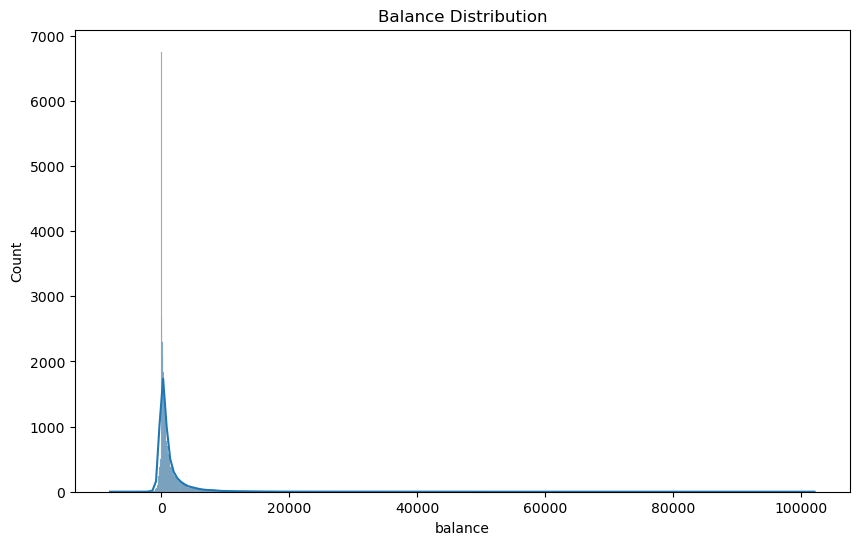

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True)
plt.title('Balance Distribution')
plt.show()

In [68]:
data_1 = df[(df['balance']>0) &(df['balance']<10000)]
data_1

Unnamed: 0  age           job   marital  education default  balance  \
0               0   58    management   married   tertiary      no     2143   
1               1   44    technician    single  secondary      no       29   
2               2   33  entrepreneur   married  secondary      no        2   
3               3   47   blue-collar   married    unknown      no     1506   
4               4   33       unknown    single    unknown      no        1   
...           ...  ...           ...       ...        ...     ...      ...   
40206       45206   51    technician   married   tertiary      no      825   
40207       45207   71       retired  divorced    primary      no     1729   
40208       45208   72       retired   married  secondary      no     5715   
40209       45209   57   blue-collar   married  secondary      no      668   
40210       45210   37  entrepreneur   married  secondary      no     2971   

      housing loan    contact  day  month  duration  campaign  pdays  \
0         yes   no    unknown    5      5       261         1     -1   
1         yes   no    unknown    5      5       151         1     -1   
2         yes  yes    unknown    5      5        76         1     -1   
3         yes   no    unknown    5      5        92         1     -1   
4          no   no    unknown    5      5       198         1     -1   
...       ...  ...        ...  ...    ...       ...       ...    ...   
40206      no   no   cellular   17     11       977         3     -1   
40207      no   no   cellular   17     11       456         2     -1   
40208      no   no   cellular   17     11      1127         5    184   
40209      no   no  telephone   17     11       508         4     -1   
40210      no   no   cellular   17     11       361         2    188   

       previous poutcome    y age_category  
0             0  unknown   no        50-60  
1             0  unknown   no        40-50  
2             0  unknown   no        30-40  
3             0  unknown   no        40-50  
4             0  unknown   no        30-40  
...         ...      ...  ...          ...  
40206         0  unknown  yes        50-60  
40207         0  unknown  yes          60+  
40208         3  success  yes          60+  
40209         0  unknown   no        50-60  
40210        11    other   no        30-40  

[33012 rows x 19 columns]

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


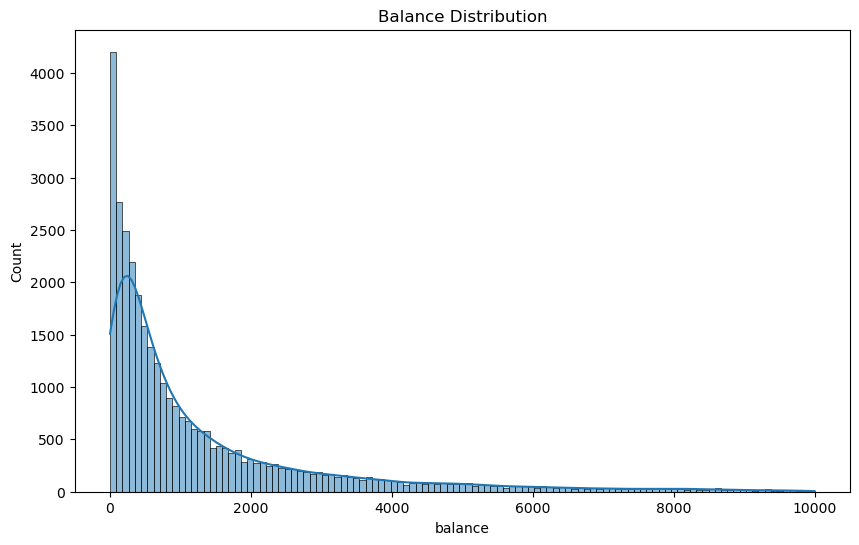

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data_1,x='balance', kde=True)
plt.title('Balance Distribution')
plt.show()

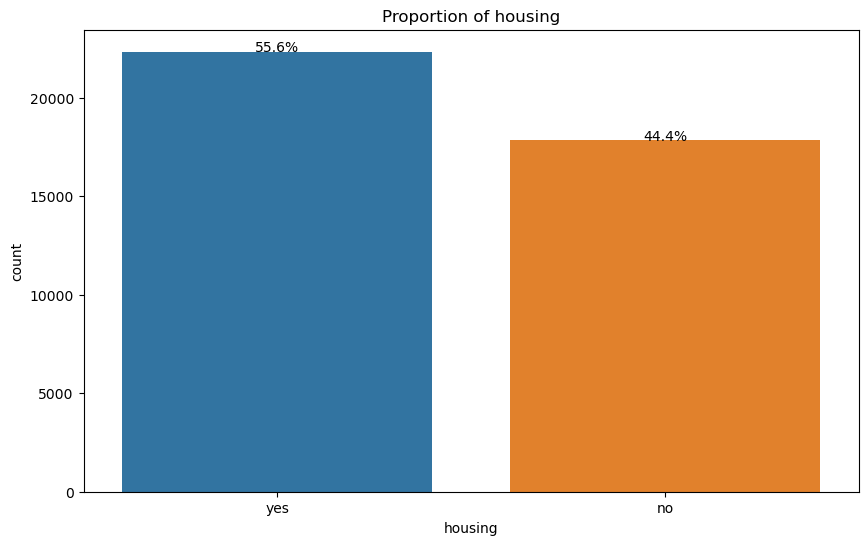

In [70]:
plot_proportion_countplot(df, 'housing')

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\4124622868.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'housing']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\4124622868.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('age_category').size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

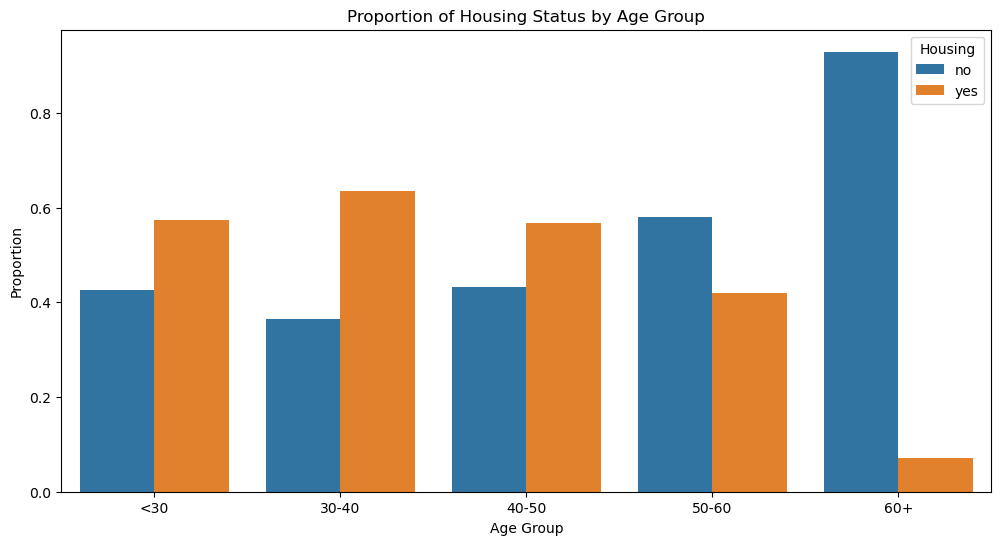

In [71]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'housing']).size().reset_index(name='count')
total_counts = df.groupby('age_category').size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on='age_category')
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Housing Loan Status by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='proportion', hue='housing', data=proportion_df, dodge=True)
plt.title('Proportion of Housing Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Housing')
plt.show()

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\233987094.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'education', 'housing']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\233987094.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(['age_category', 'education']).size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

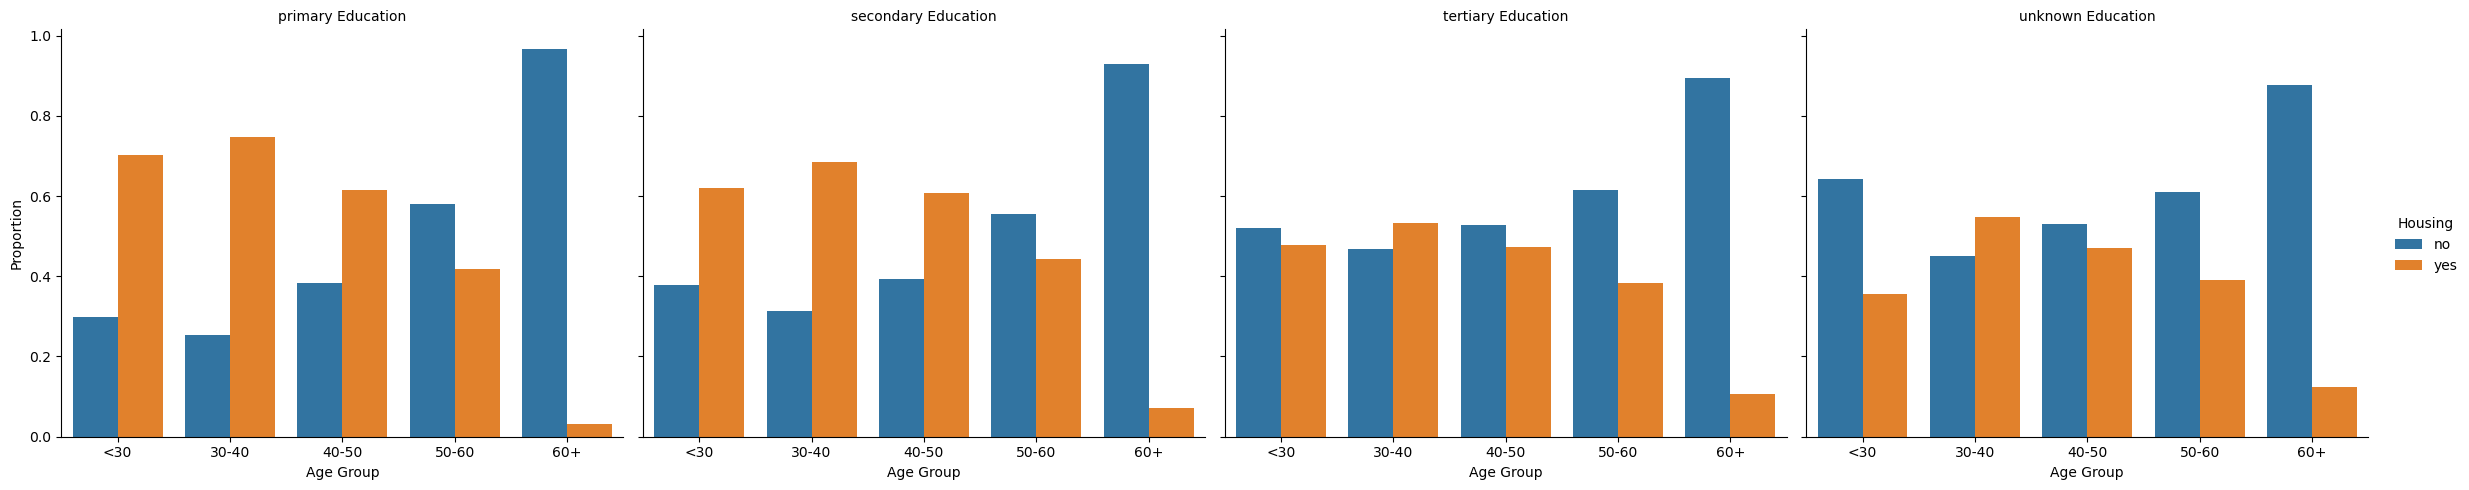

In [72]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'education', 'housing']).size().reset_index(name='count')
total_counts = df.groupby(['age_category', 'education']).size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on=['age_category', 'education'])
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Housing Loan Status by Age Group sliced by Education
g = sns.catplot(x='age_category', y='proportion', hue='housing', col='education', data=proportion_df, kind='bar', dodge=True, height=5, aspect=1.2)
g.set_titles(col_template="{col_name} Education")
g.set_axis_labels("Age Group", "Proportion")
g._legend.set_title('Housing')
plt.show()

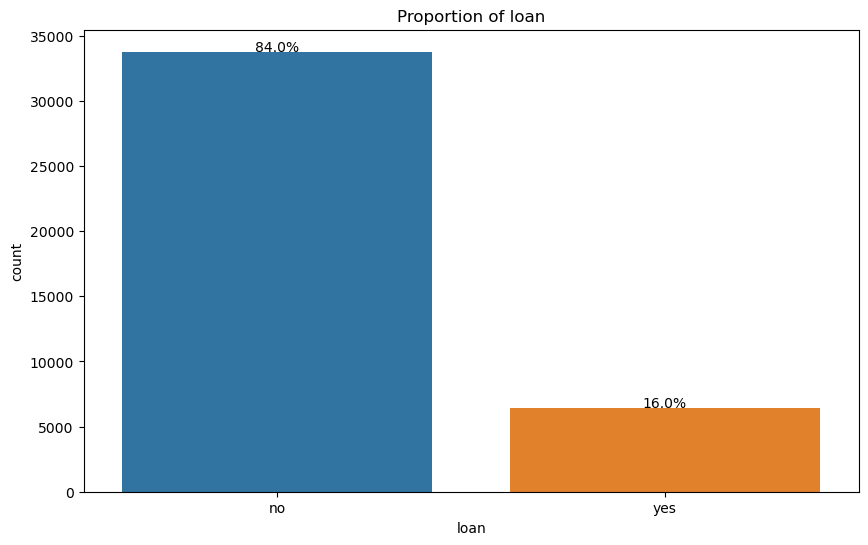

In [73]:
plot_proportion_countplot(df, 'loan')

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1104770932.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'loan']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1104770932.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('age_category').size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed

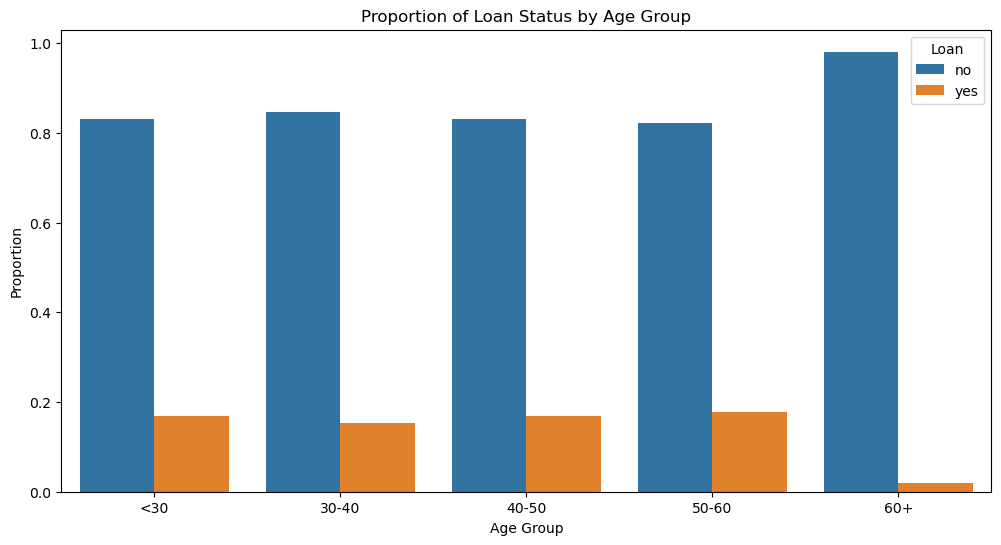

In [74]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'loan']).size().reset_index(name='count')
total_counts = df.groupby('age_category').size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on='age_category')
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Housing Loan Status by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='proportion', hue='loan', data=proportion_df, dodge=True)
plt.title('Proportion of Loan Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Loan')
plt.show()

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1866723906.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'education', 'loan']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1866723906.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(['age_category', 'education']).size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

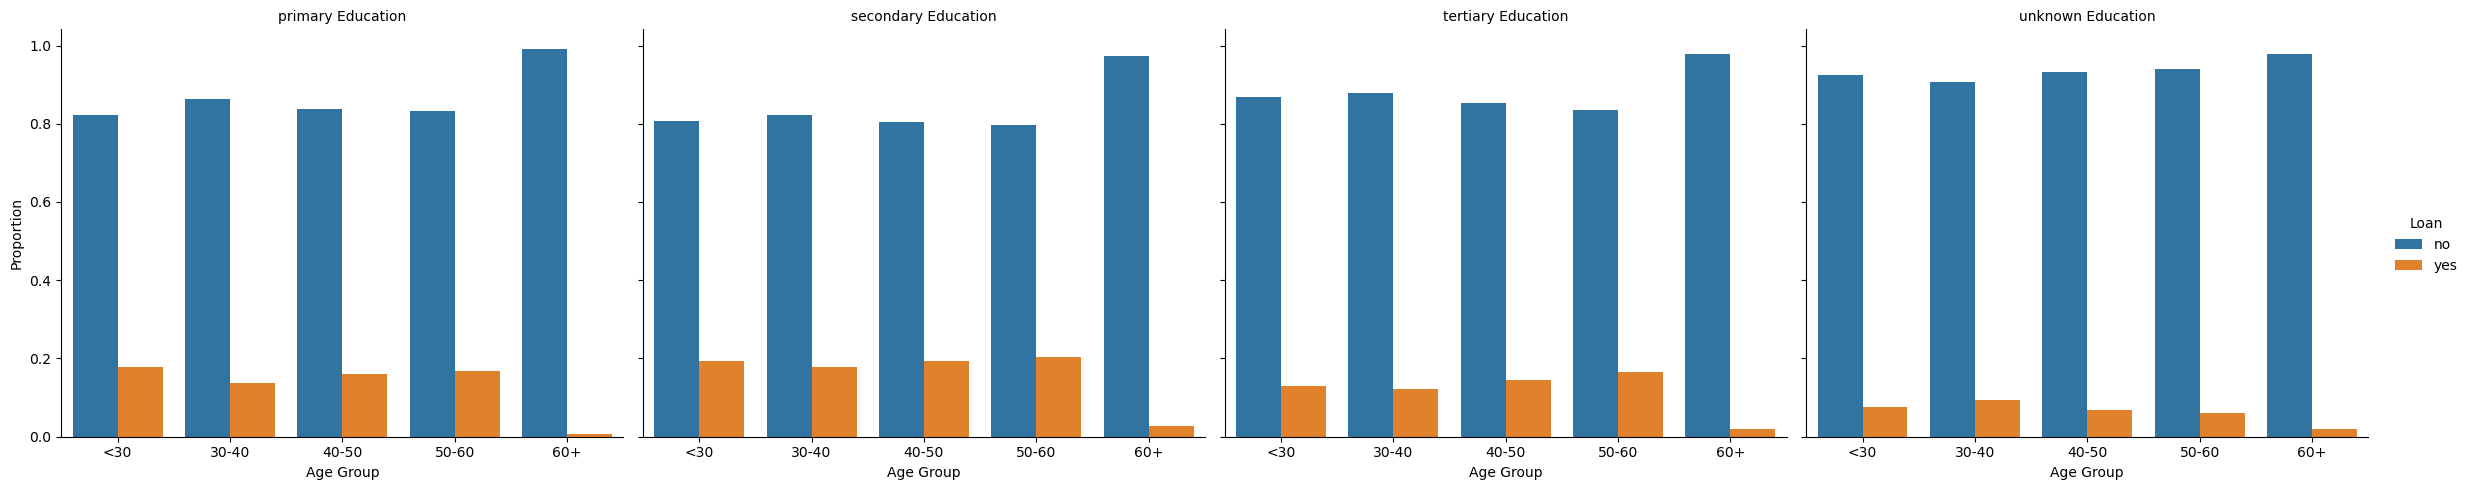

In [75]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'education', 'loan']).size().reset_index(name='count')
total_counts = df.groupby(['age_category', 'education']).size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on=['age_category', 'education'])
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Housing Loan Status by Age Group sliced by Education
g = sns.catplot(x='age_category', y='proportion', hue='loan', col='education', data=proportion_df, kind='bar', dodge=True, height=5, aspect=1.2)
g.set_titles(col_template="{col_name} Education")
g.set_axis_labels("Age Group", "Proportion")
g._legend.set_title('Loan')
plt.show()

c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


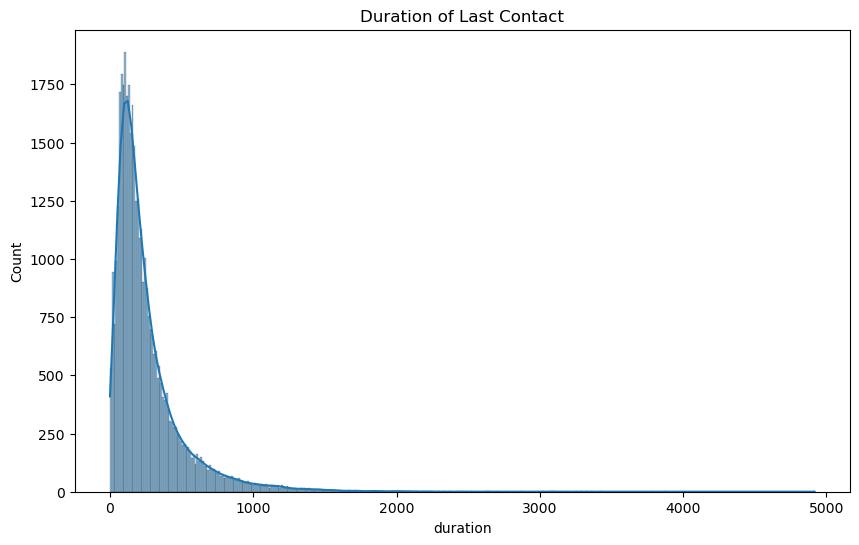

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True)
plt.title('Duration of Last Contact')
plt.show()

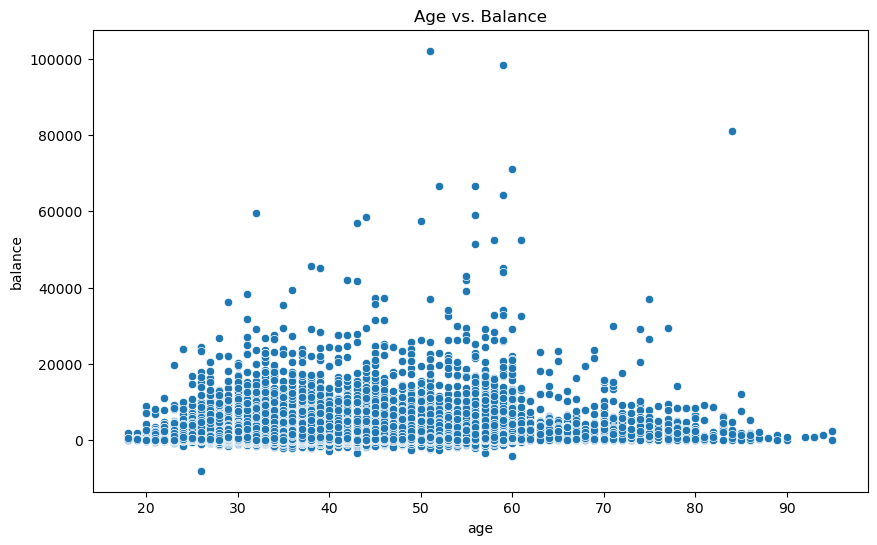

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Age vs. Balance')
plt.show()

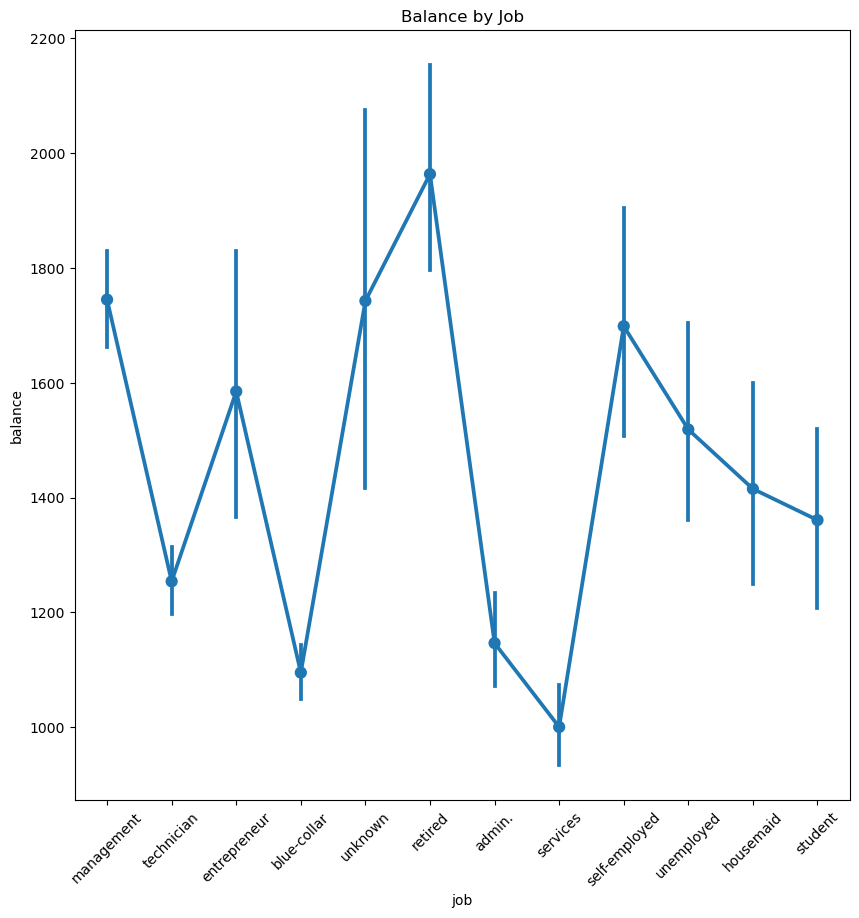

In [78]:
plt.figure(figsize=(10, 10))
sns.pointplot(x='job', y='balance', data=df)
plt.title('Balance by Job')
plt.xticks(rotation=45)
plt.show()

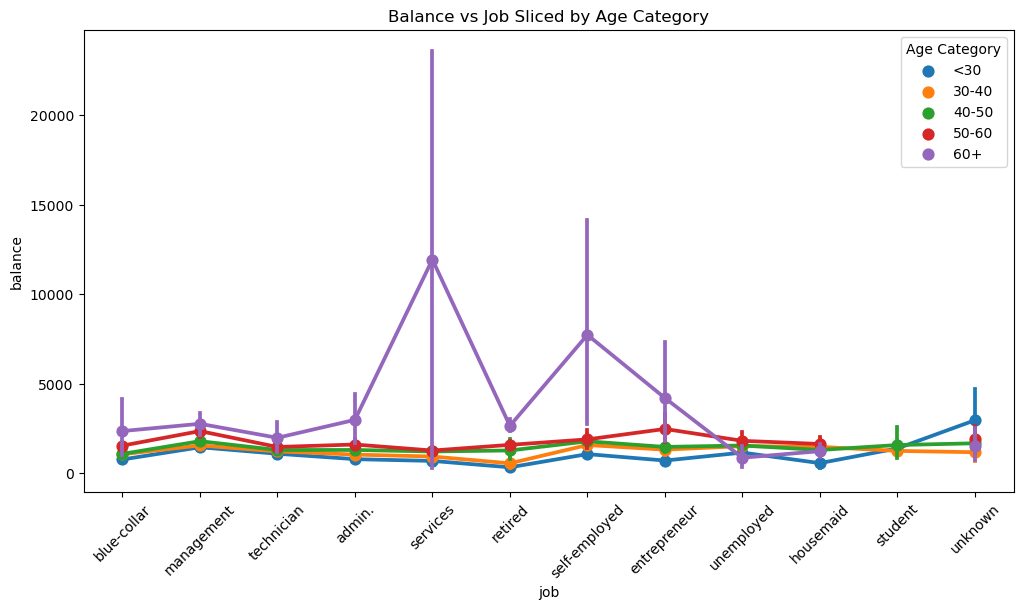

In [79]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Plotting Balance vs Job with Age Categories as hue
plt.figure(figsize=(12, 6))
sns.pointplot(x='job', y='balance', hue='age_category', data=df, order=df['job'].value_counts().index)
plt.title('Balance vs Job Sliced by Age Category')
plt.xticks(rotation=45)
plt.legend(title='Age Category')
plt.show()

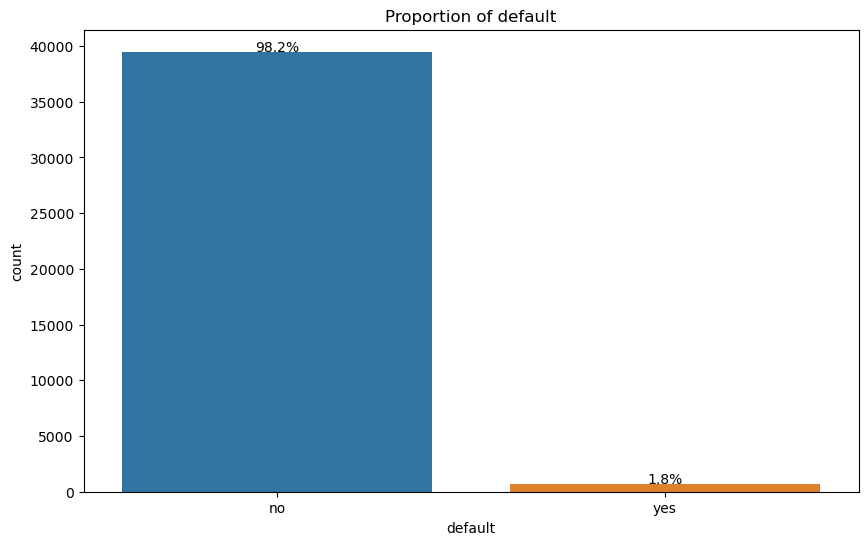

In [80]:
plot_proportion_countplot(df, 'default')

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1364644753.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'default']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1364644753.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('age_category').size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

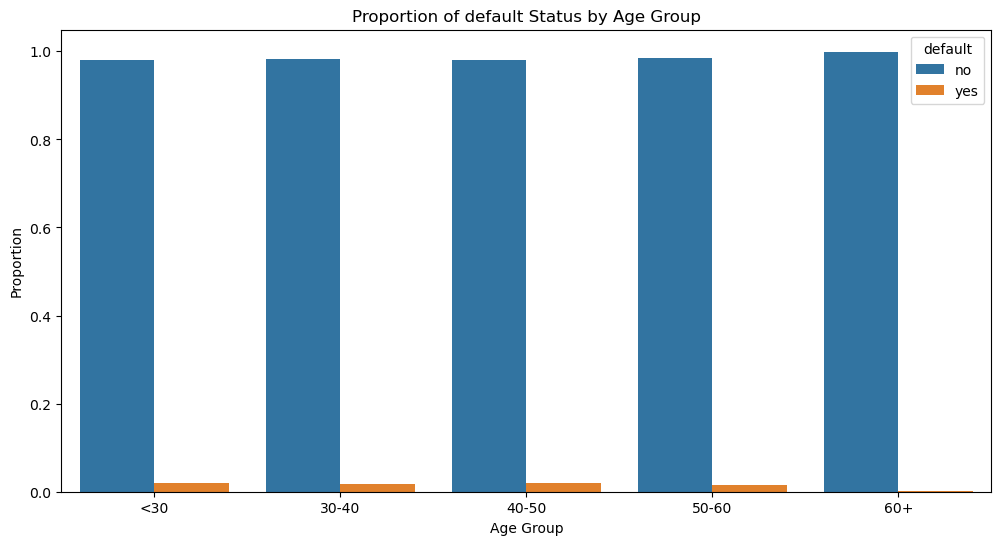

In [81]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'default']).size().reset_index(name='count')
total_counts = df.groupby('age_category').size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on='age_category')
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Housing Loan Status by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_category', y='proportion', hue='default', data=proportion_df, dodge=True)
plt.title('Proportion of default Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='default')
plt.show()

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1108003483.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = df.groupby(['age_category', 'education', 'default']).size().reset_index(name='count')
C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1108003483.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(['age_category', 'education']).size().reset_index(name='total')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future v

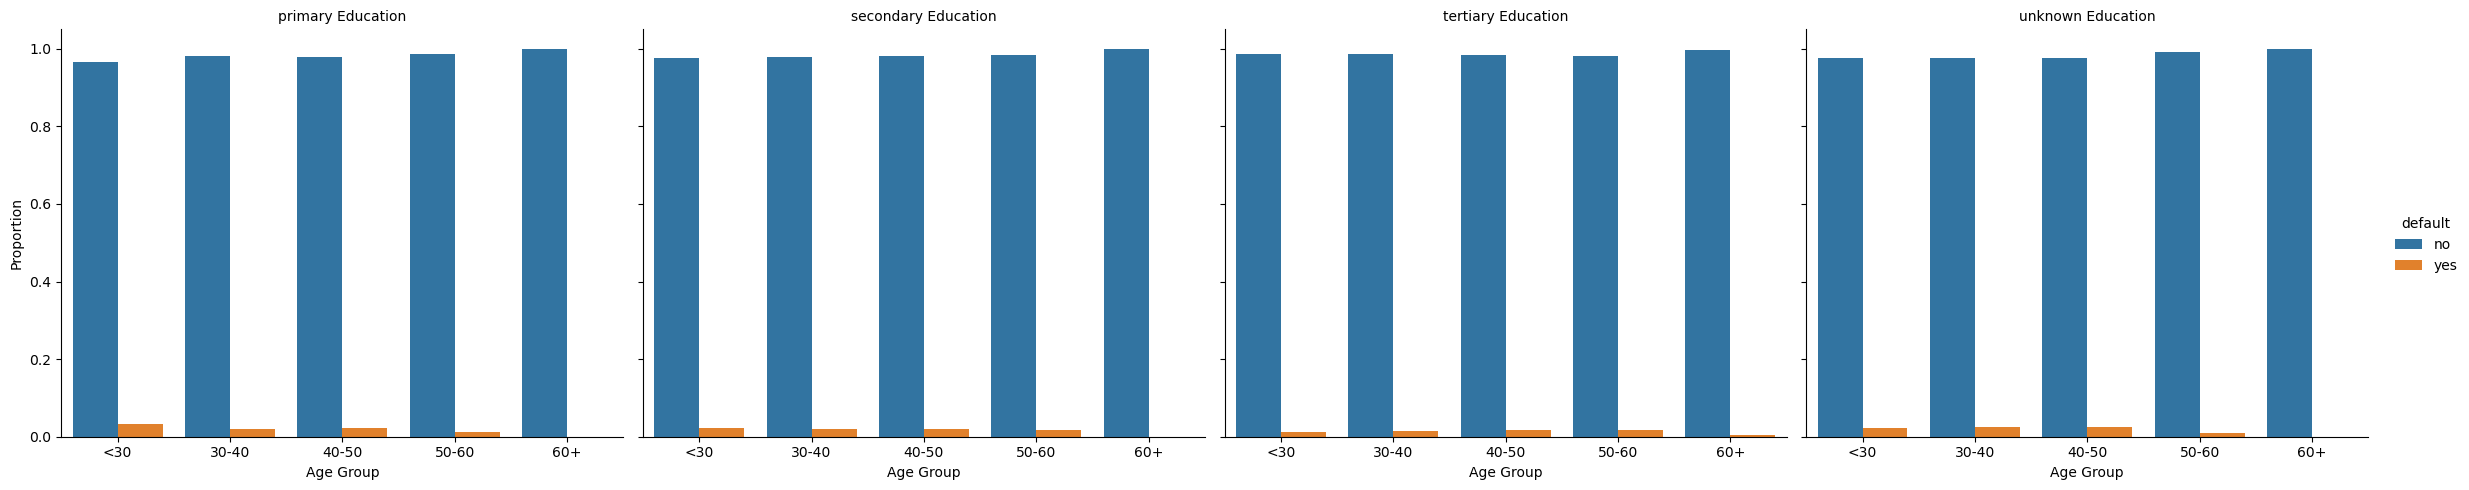

In [82]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Calculating proportions
proportion_df = df.groupby(['age_category', 'education', 'default']).size().reset_index(name='count')
total_counts = df.groupby(['age_category', 'education']).size().reset_index(name='total')
proportion_df = pd.merge(proportion_df, total_counts, on=['age_category', 'education'])
proportion_df['proportion'] = proportion_df['count'] / proportion_df['total']

# Plotting Proportion of Housing Loan Status by Age Group sliced by Education
g = sns.catplot(x='age_category', y='proportion', hue='default', col='education', data=proportion_df, kind='bar', dodge=True, height=5, aspect=1.2)
g.set_titles(col_template="{col_name} Education")
g.set_axis_labels("Age Group", "Proportion")
g._legend.set_title('default')
plt.show()

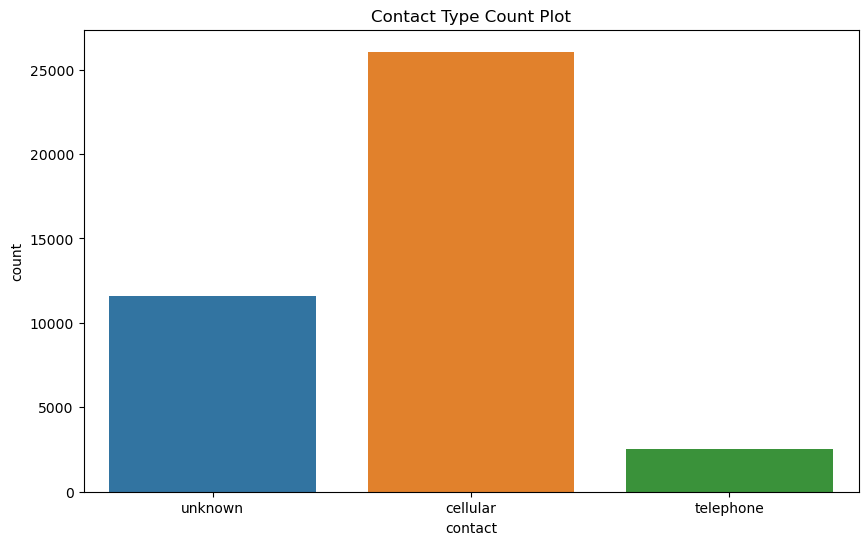

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', data=df)
plt.title('Contact Type Count Plot')
plt.show()

<Axes: xlabel='contact', ylabel='proportion'>

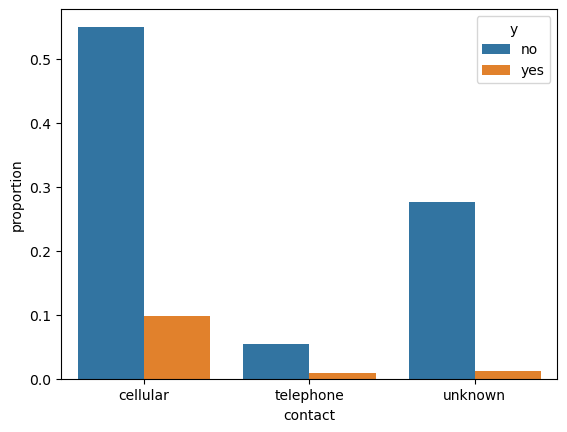

In [84]:
df_c = df.groupby(['contact','y']).size().reset_index(name='count')
df_c['proportion'] = df_c['count']/len(df)
sns.barplot(df_c,x='contact',y='proportion',hue='y')

In [85]:
df_c[df_c['y']=='yes'][['contact','proportion']].to_dict()

{'contact': {1: 'cellular', 3: 'telephone', 5: 'unknown'},
 'proportion': {1: 0.09756036905324414,
  3: 0.008455397776727762,
  5: 0.011837556887418865}}

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\2336649972.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_a = df.groupby(['age_category','y']).size().reset_index(name='count')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

<Axes: xlabel='age_category', ylabel='proportion'>

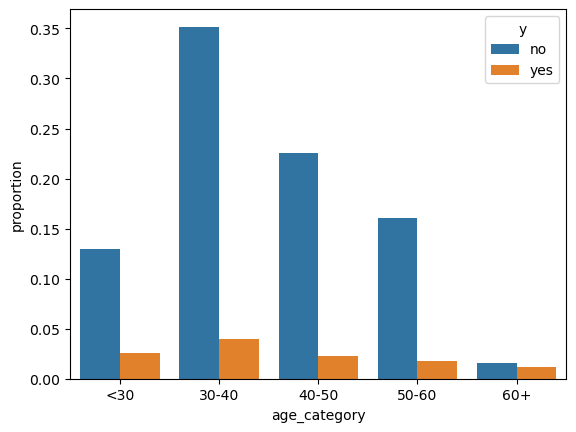

In [86]:
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df_a = df.groupby(['age_category','y']).size().reset_index(name='count')
df_a['proportion'] = df_a['count']/len(df)
sns.barplot(data=df_a,x='age_category',y='proportion',hue='y')

In [87]:
df_a[df_a['y']=='yes'][['age_category','proportion']].to_dict()

{'age_category': {1: '<30', 3: '30-40', 5: '40-50', 7: '50-60', 9: '60+'},
 'proportion': {1: 0.025490537415135163,
  3: 0.040063664171495365,
  5: 0.022754967546193827,
  7: 0.018203974036955062,
  9: 0.01134018054761135}}

<Axes: xlabel='duration', ylabel='proportion'>

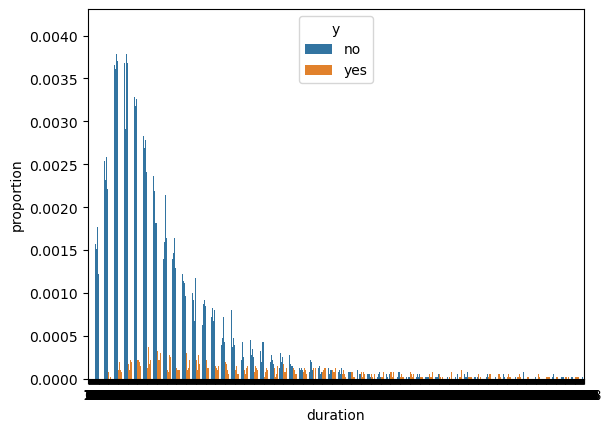

In [88]:
df_c = df.groupby(['duration','y']).size().reset_index(name='count')
df_c['proportion'] = df_c['count']/len(df)
sns.barplot(df_c,x='duration',y='proportion',hue='y')

<Axes: xlabel='month', ylabel='proportion'>

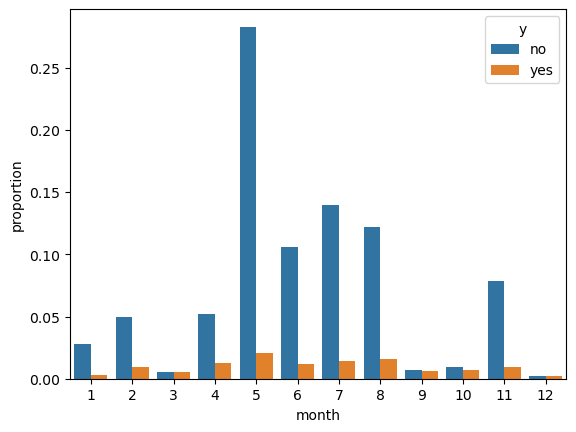

In [89]:
df_c = df.groupby(['month','y']).size().reset_index(name='count')
df_c['proportion'] = df_c['count']/len(df)
sns.barplot(df_c,x='month',y='proportion',hue='y')

In [90]:
df_c[df_c['y']=='yes'][['month','proportion']].to_dict()

{'month': {1: 1,
  3: 2,
  5: 3,
  7: 4,
  9: 5,
  11: 6,
  13: 7,
  15: 8,
  17: 9,
  19: 10,
  21: 11,
  23: 12},
 'proportion': {1: 0.0030588644898162194,
  3: 0.009673969809256174,
  5: 0.005496008554873044,
  7: 0.012732834299072394,
  9: 0.020840068637934892,
  11: 0.01181268807042849,
  13: 0.014026012782571933,
  15: 0.01574196115490786,
  17: 0.005943647260699809,
  19: 0.0071124816592474695,
  21: 0.009251199920419785,
  23: 0.002163587078162692}}

<Axes: xlabel='day', ylabel='proportion'>

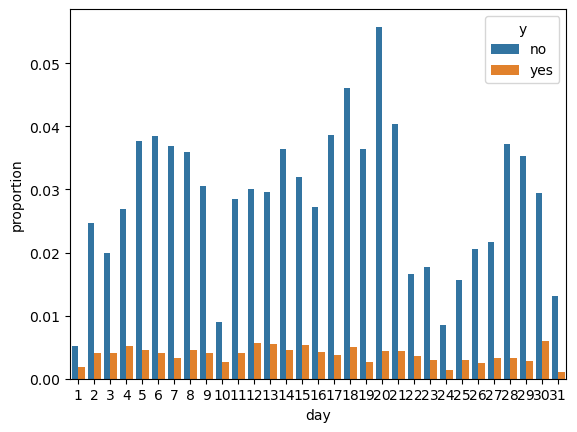

In [91]:
df_c = df.groupby(['day','y']).size().reset_index(name='count')
df_c['proportion'] = df_c['count']/len(df)
sns.barplot(df_c,x='day',y='proportion',hue='y')

In [92]:
df_c[df_c['y']=='yes'][['day','proportion']].to_dict()

{'day': {1: 1,
  3: 2,
  5: 3,
  7: 4,
  9: 5,
  11: 6,
  13: 7,
  15: 8,
  17: 9,
  19: 10,
  21: 11,
  23: 12,
  25: 13,
  27: 14,
  29: 15,
  31: 16,
  33: 17,
  35: 18,
  37: 19,
  39: 20,
  41: 21,
  43: 22,
  45: 23,
  47: 24,
  49: 25,
  51: 26,
  53: 27,
  55: 28,
  57: 29,
  59: 30,
  61: 31},
 'proportion': {1: 0.0018900300912685583,
  3: 0.004028748352440875,
  5: 0.0040784859864216256,
  7: 0.00517271393399816,
  9: 0.004575862326229141,
  11: 0.004028748352440875,
  13: 0.003307552659719977,
  15: 0.004501255875258014,
  17: 0.004028748352440875,
  19: 0.0027107010519509585,
  21: 0.004153092437392753,
  23: 0.005719827907786427,
  25: 0.005446270920892293,
  27: 0.004625599960209893,
  29: 0.005396533286911542,
  31: 0.004277436522344632,
  33: 0.0037800601825371165,
  35: 0.004998632215065529,
  37: 0.002685832234960583,
  39: 0.0043769117903061355,
  41: 0.004426649424286886,
  43: 0.0035811096466141106,
  45: 0.002909651587873965,
  47: 0.0014175225684514188,
  49: 0.0

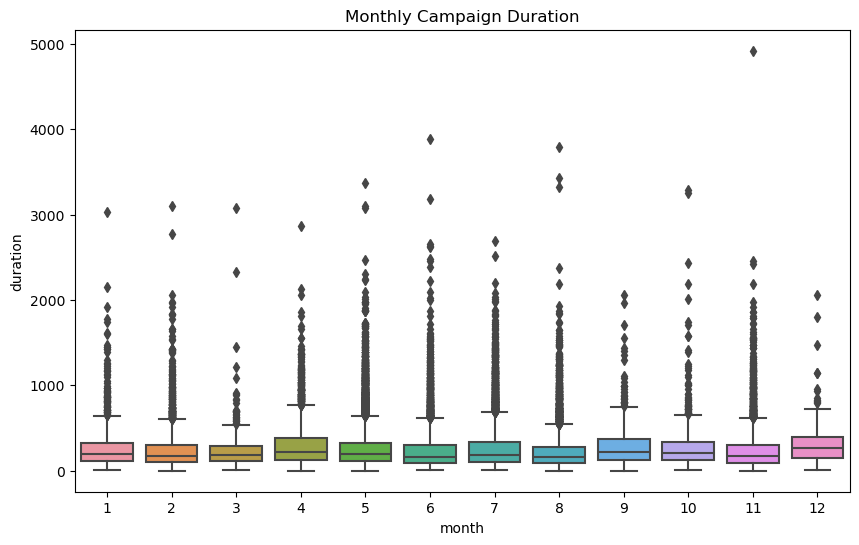

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='duration', data=df)
plt.title('Monthly Campaign Duration')
plt.show()

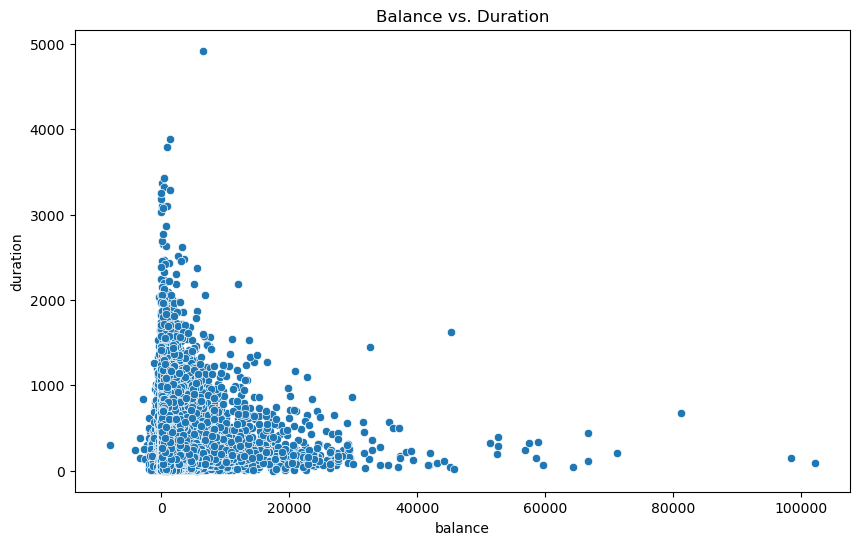

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='balance', y='duration', data=df)
plt.title('Balance vs. Duration')
plt.show()

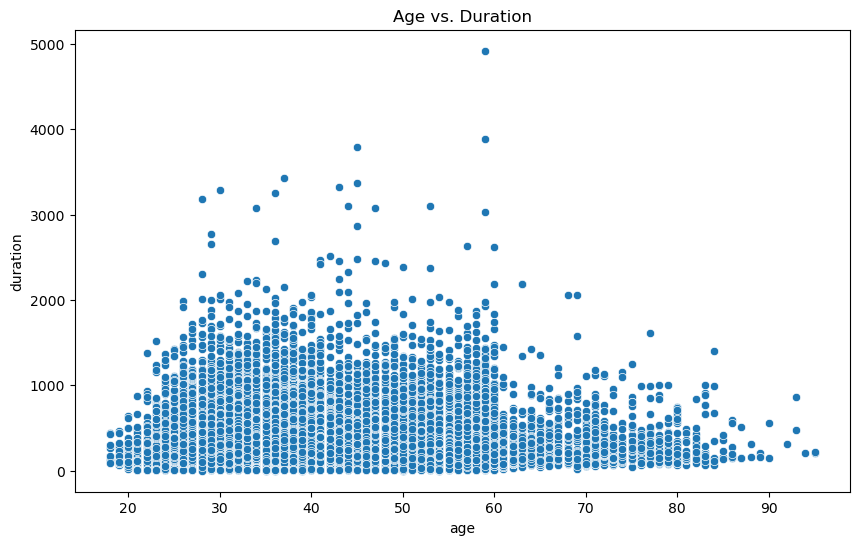

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=df)
plt.title('Age vs. Duration')
plt.show()

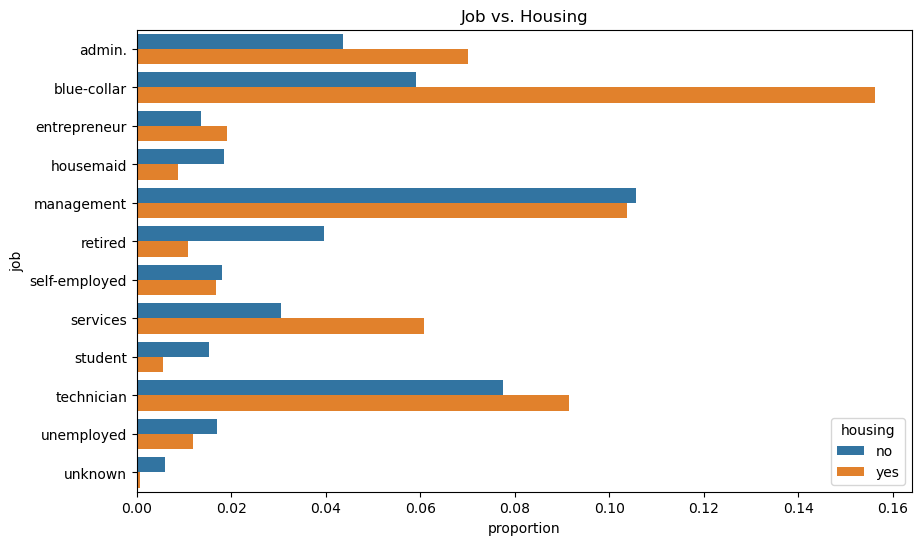

In [96]:
plt.figure(figsize=(10, 6))
data = df.groupby(['job','housing']).size().reset_index(name='count')
data['proportion'] = data['count']/len(df)
sns.barplot(data=data,x='proportion',y='job',hue='housing')
plt.title('Job vs. Housing')
plt.show()

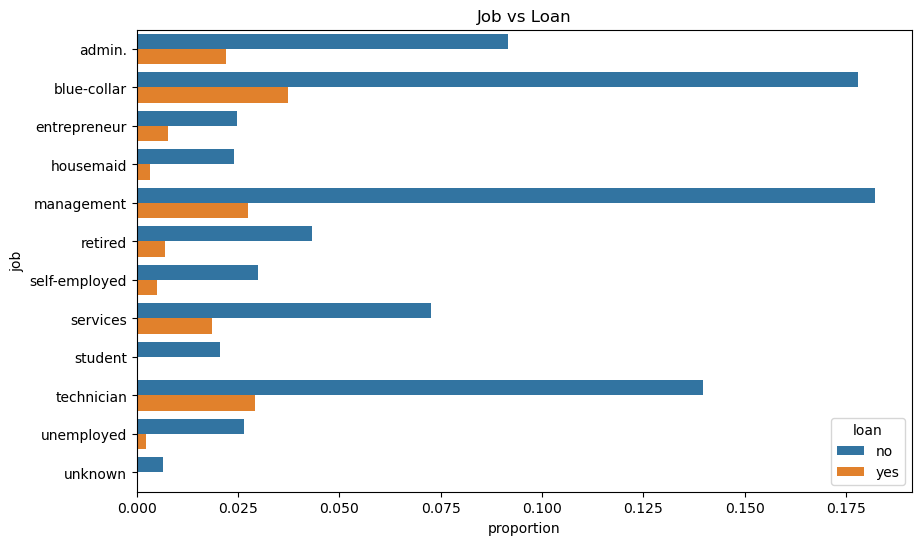

In [97]:
plt.figure(figsize=(10, 6))
data = df.groupby(['job','loan']).size().reset_index(name='count')
data['proportion'] = data['count']/len(df)
sns.barplot(data=data,x='proportion',y='job',hue='loan')
plt.title('Job vs Loan')
plt.show()

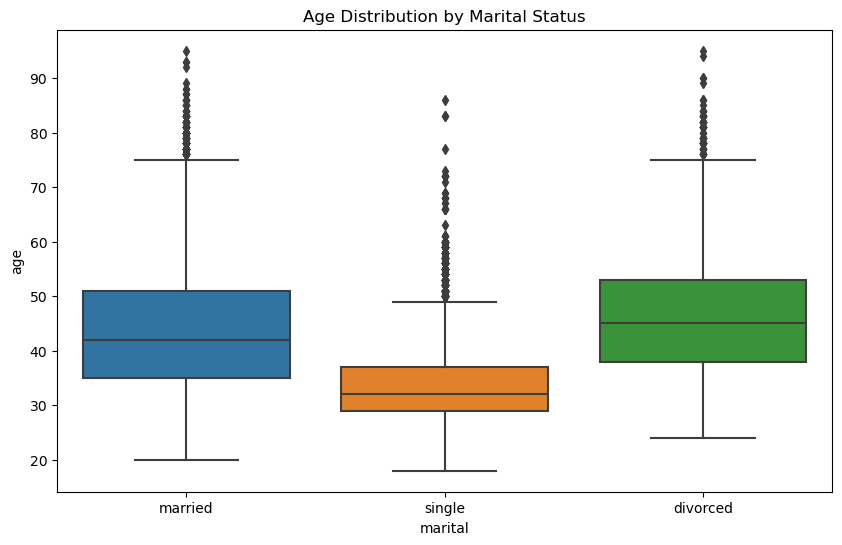

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', data=df)
plt.title('Age Distribution by Marital Status')
plt.show()

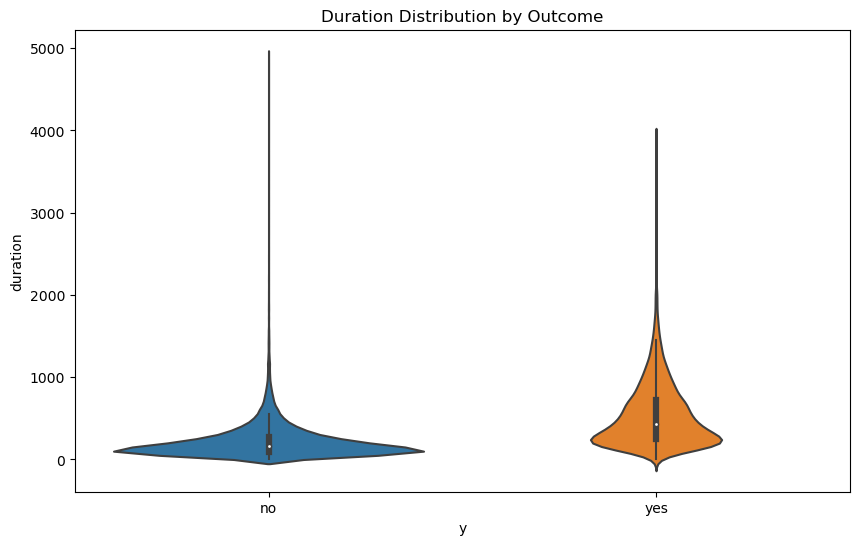

In [99]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='duration', data=df)
plt.title('Duration Distribution by Outcome')
plt.show()

In [100]:
df_d = df.groupby(['y','month']).size().reset_index(name='count')
df_d['prop'] = df_d['count']/len(df)
df_d

y  month  count      prop
0    no      1   1132  0.028152
1    no      2   1985  0.049365
2    no      3    210  0.005222
3    no      4   2095  0.052100
4    no      5  11376  0.282908
5    no      6   4250  0.105692
6    no      7   5614  0.139614
7    no      8   4918  0.122305
8    no      9    275  0.006839
9    no     10    370  0.009201
10   no     11   3146  0.078237
11   no     12    101  0.002512
12  yes      1    123  0.003059
13  yes      2    389  0.009674
14  yes      3    221  0.005496
15  yes      4    512  0.012733
16  yes      5    838  0.020840
17  yes      6    475  0.011813
18  yes      7    564  0.014026
19  yes      8    633  0.015742
20  yes      9    239  0.005944
21  yes     10    286  0.007112
22  yes     11    372  0.009251
23  yes     12     87  0.002164

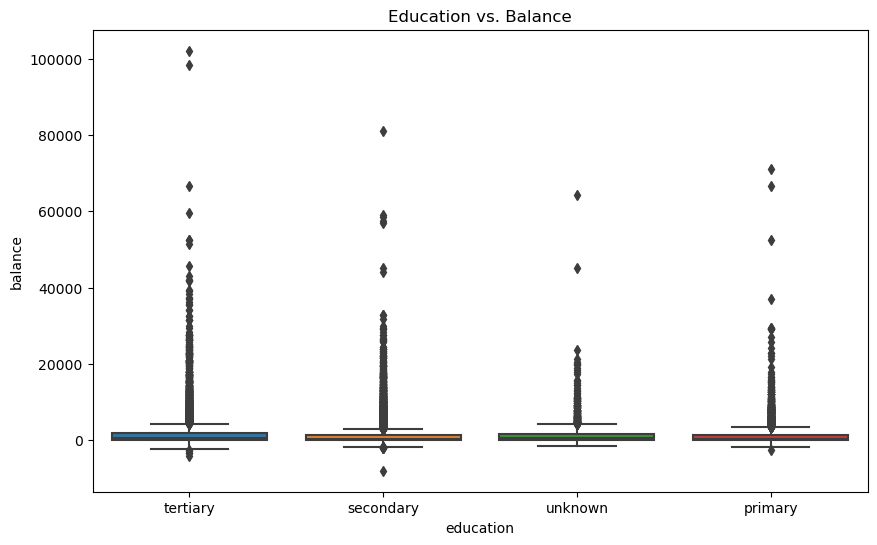

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='balance', data=df)
plt.title('Education vs. Balance')
plt.show()

<Axes: xlabel='loan', ylabel='proportion'>

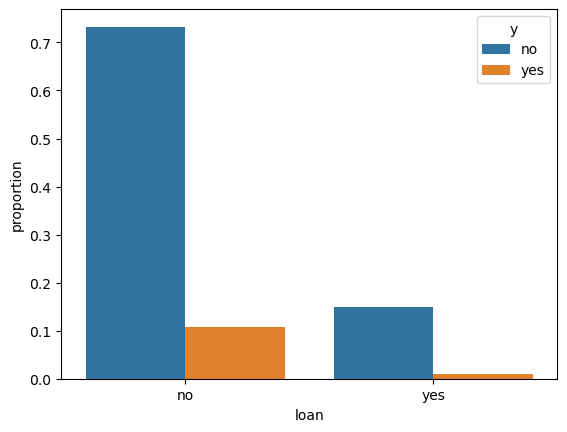

In [102]:
df_c = df.groupby(['loan','y']).size().reset_index(name='count')
df_c['proportion'] = df_c['count']/len(df)
sns.barplot(df_c,x='loan',y='proportion',hue='y')

In [103]:
df_d = df.groupby(['y','loan']).size().reset_index(name='count')
df_d['prop'] = df_d['count']/len(df)
df_d[df_d['y']=='yes'].to_dict()

{'y': {2: 'yes', 3: 'yes'},
 'loan': {2: 'no', 3: 'yes'},
 'count': {2: 4306, 3: 433},
 'prop': {2: 0.10708512596055805, 3: 0.010768197756832708}}

<Axes: xlabel='duration', ylabel='y'>

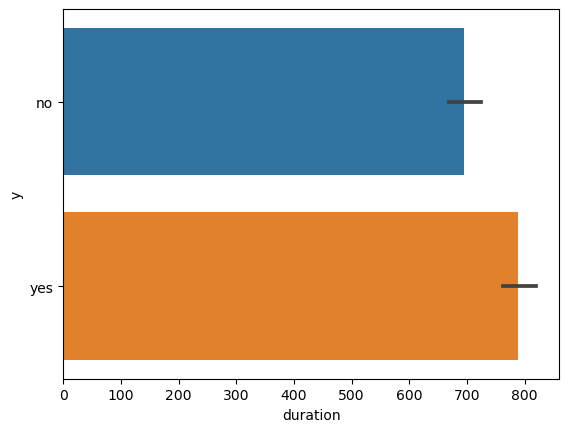

In [104]:
df_d = df.groupby(['y','duration']).size().reset_index(name='count')
df_d['prop'] = df_d['count']/len(df)
sns.barplot(data=df_d,x='duration',y='y')

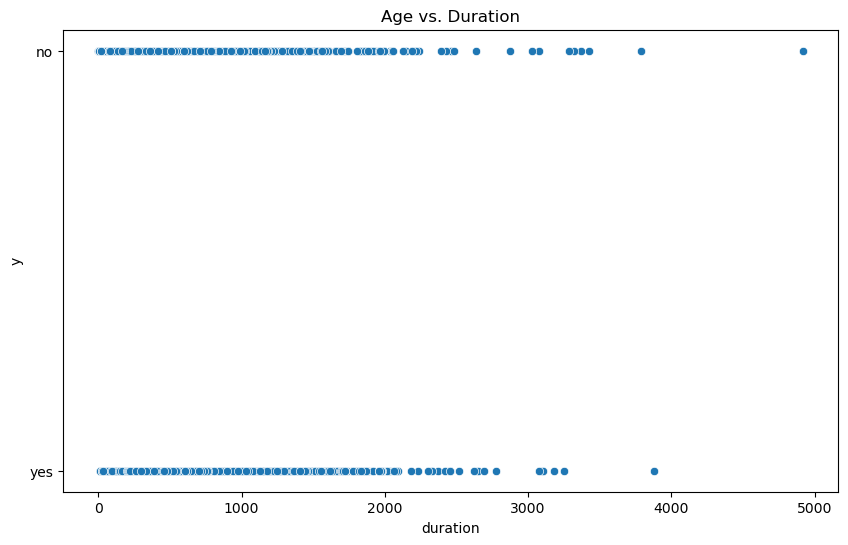

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='y', data=df)
plt.title('Age vs. Duration')
plt.show()

In [106]:
age_bins = np.linspace(0,500,30).tolist()
age_labels = [np.round(x,0) for x in age_bins]
age_labels.pop()
df['duration_cat'] = pd.cut(df['duration'], bins=age_bins, labels=age_labels)
df['y_num'] = df['y'].map({'yes':1,'no':0})

In [107]:
df[['duration_cat','y']].head()

duration_cat   y
0        259.0  no
1        138.0  no
2         69.0  no
3         86.0  no
4        190.0  no

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\1705854578.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_d = df.groupby(['y','duration_cat']).size().reset_index(name='count')
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ZianKaradzoski\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

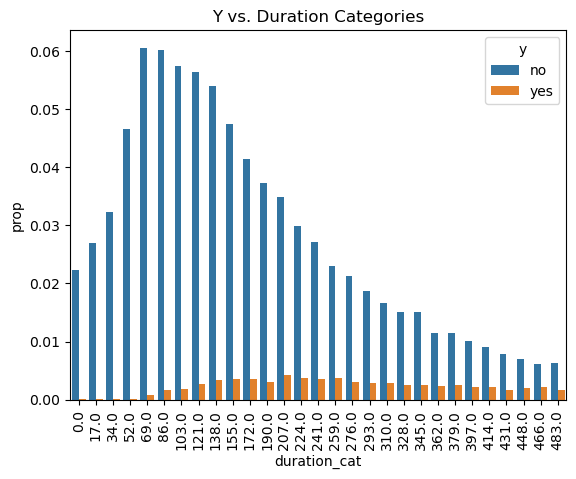

In [108]:
df_d = df.groupby(['y','duration_cat']).size().reset_index(name='count')
df_d['prop'] = df_d['count']/len(df)
sns.barplot(x='duration_cat', y='prop', hue='y', data=df_d)  # aspect controls the width
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('Y vs. Duration Categories')
plt.show()

In [109]:
df_d = df.groupby(['y','duration_cat']).size().reset_index(name='count')
df_d['prop'] = df_d['count']/len(df)
df_d = df_d[df_d['y']=='yes'][['duration_cat','prop']]

C:\Users\ZianKaradzoski\AppData\Local\Temp\ipykernel_13228\154977739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_d = df.groupby(['y','duration_cat']).size().reset_index(name='count')


In [110]:
duration_to_prop_mapping = pd.Series(df_d.prop.values, index=df_d.duration_cat).to_dict()

In [111]:
duration_to_prop_mapping

{0.0: 4.973763398075154e-05,
 17.0: 9.947526796150308e-05,
 34.0: 4.973763398075154e-05,
 52.0: 0.00019895053592300615,
 69.0: 0.0007709333267016488,
 86.0: 0.0015916042873840492,
 103.0: 0.0019148989082589342,
 121.0: 0.002685832234960583,
 138.0: 0.003431896744671856,
 155.0: 0.0035562408296237347,
 172.0: 0.003531372012633359,
 190.0: 0.003108602123796971,
 207.0: 0.004327174156325384,
 224.0: 0.003655716097585238,
 241.0: 0.003531372012633359,
 259.0: 0.003680584914575614,
 276.0: 0.002984258038845092,
 293.0: 0.0029345204048643408,
 310.0: 0.002909651587873965,
 328.0: 0.002611225783989456,
 345.0: 0.0024868816990375768,
 362.0: 0.0023376687970953222,
 379.0: 0.002536619333018328,
 397.0: 0.002163587078162692,
 414.0: 0.002238193529133819,
 431.0: 0.0016910795553455522,
 448.0: 0.0020641118102011887,
 466.0: 0.0021884558951530677,
 483.0: 0.001616473104374425}